In [838]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
pd.options.display.max_columns = None
import geopandas as gpd
import geoplot as gp
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patches



# Introduction

Hello reader, my goal in this study is to analyze the variables that either contribute or correlate with a specific Youtuber around their success in 2023, specifically in their subscribers and earnings. The goal is to understand which variables are most influential on success for a Youtuber, in which at the same time we must figure out how to measure success.

The main variables I'll be analyzing are Category, Enrollment %, Country, Population, Uploads, and Video Views. I chose these because they can have varying degrees of impact depending on the type of viewer and for their purpose.

Although these there are many factors that can contribute to a Youtubers success that we may not understand yet, we will figure out how to measure success and look to predict future success with the information available.

HERE IS MY GITHUB FOR CODE.

## Data

I used a dataset from Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023

In [14]:
rawdf = pd.read_csv('Global_YouTube_Statistics.csv',encoding ='latin-1')

In [45]:
rawdf.head(6)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.000000e+00,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN


From playing around in the dataset, I saw that there were certain Youtuber's that were errors, you can see here as 'Music' at rank 6 is not a Youtuber, but possibly just a bug in reading a category of music.

To single these out, I searched for video views less than 1, and it is pretty clear that these are errors since they have large amounts of subscribers with no earnings estimates or video views, with many NaN values

In [16]:
df = rawdf.drop(rawdf[rawdf['video views'] < 1].index)

In [594]:
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,youtuber_count,earnings_per_sub,last_30day_view_conversion,links,overall_view_conversion,youtuber_count,youtuber_count,youtuber_count
0,1.0,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082.0,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,1,0.442449,0.000886,5,0.001075,1,1,1
2,3.0,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741.0,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,1,0.389759,0.005935,2,0.005851,1,1,1
3,4.0,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966.0,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,1,0.585185,0.000506,6,0.000988,1,1,1
4,5.0,SET India,159000000.0,1.480000e+11,Shows,SET India,116536.0,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.0,5500000.0,87500000.0,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,1,0.550314,0.000548,5,0.001074,1,1,1
6,7.0,ýýý Kids Diana Show,112000000.0,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111.0,United States,US,Entertainment,5.0,3.0,3.0,7.316740e+08,182900.0,2900000.0,2200000.0,35100000.0,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,1,0.313393,NaN,8,0.001201,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991.0,Natan por Aï¿,12300000.0,9.029610e+09,Sports,Natan por Aï¿,1200.0,Brazil,BR,Entertainment,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.0,1700000.0,26500000.0,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280,1,2.154472,0.001267,0,0.001362,1,1,1
991,992.0,Free Fire India Official,12300000.0,1.674410e+09,People & Blogs,Free Fire India Official,1500.0,India,IN,Games,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.0,194200.0,3100000.0,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,1,0.252033,0.004634,0,0.007346,1,1,1
992,993.0,Panda,12300000.0,2.214684e+09,Gaming,HybridPanda,2452.0,United Kingdom,GB,Games,129005.0,867.0,1202.0,6.703500e+04,17.0,268.0,201.0,3200.0,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973,1,0.000260,0.014918,0,0.005554,1,1,1
993,994.0,RobTopGames,12300000.0,3.741235e+08,Gaming,RobTopGames,39.0,Sweden,SE,Games,35112.0,4.0,69.0,3.871000e+06,968.0,15500.0,11600.0,185800.0,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501,1,0.015106,0.025833,0,0.032877,1,1,1


After further exploration, we can see that channel_type and category are different.

In [22]:
df.category.unique()

array(['Music', 'Entertainment', 'Education', 'Shows', 'People & Blogs',
       'Gaming', 'Sports', 'Film & Animation', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       nan, 'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [23]:
df.channel_type.unique()

array(['Music', 'Entertainment', 'Education', 'People', 'Sports', 'Film',
       'News', nan, 'Games', 'Comedy', 'Howto', 'Nonprofit', 'Autos',
       'Tech', 'Animals'], dtype=object)

From a bit of research, I found that the category selection seemed to be more in-line with the native YouTube categories. I will clean the category section since there was also some NaNs or incomplete values. For any NaNs on the category part I will input the corresponding channel_type if needed.

In [25]:
def cat_cleaner(string):
    if string == 'Animals': 
        return 'Pets & Animals'
    elif string == 'Autos': 
        return 'Autos & Vehicles'
    elif string == 'Film': 
        return 'Film & Animation'
    elif string == 'Games': 
        return 'Gaming'
    elif string == 'Howto': 
        return 'Howto & Style'
    elif string == 'News': 
        return 'News & Politics'
    elif string == 'Nonprofit': 
        return 'Nonprofits & Activism'
    elif string == 'People': 
        return 'People & Blogs'
    elif string == 'Tech': 
        return 'Science & Technology'
    else:
        return string 

In [26]:
for index, row in df.iterrows():
    if df.category.isnull()[index]:
        df.category[index] = cat_cleaner(df.channel_type[index])

In [329]:
#adjusting a few specific cases I saw in the top few records
df[df.Youtuber == 'Busy Fun Ltd']['category'].index
df.at[445, 'category'] = 'Comedy'
df[df.Youtuber == 'KL BRO Biju Rithvik'].Country.index
df.at[302, 'Country'] = 'India'
df[df.Youtuber == 'BeatboxJCOP'].Country.index
df.at[483, 'Country'] = 'South Korea'

In [379]:
df[df.Youtuber == 'BeatboxJCOP'].links.index[0]


483

In [386]:
#adding links to youtubers in the top10 charts to analyze social media links
#df['links'] = 0 #adding a new column 'links' and setting to 0, for this project I will manually add the links but future works could be webscraped
df.at[df[df.Youtuber == 'T-Series'].links.index[0],'links'] = 5
df.at[df[df.Youtuber == "MrBeast"].links.index[0],'links'] = 2
df.at[df[df.Youtuber == "Cocomelon - Nursery Rhymes"].links.index[0],'links'] = 6
df.at[df[df.Youtuber == "SET India"].links.index[0],'links'] = 5
df.at[df[df.Youtuber == "ýýý Kids Diana Show"].links.index[0],'links'] = 8
df.at[df[df.Youtuber == "PewDiePie"].links.index[0],'links'] = 2
df.at[df[df.Youtuber == "Like Nastya"].links.index[0],'links'] = 5
df.at[df[df.Youtuber == "Vlad and Niki"].links.index[0],'links'] = 2
df.at[df[df.Youtuber == "Zee Music Company"].links.index[0],'links'] = 4
df.at[df[df.Youtuber == "WWE"].links.index[0],'links'] = 6
df.at[df[df.Youtuber == "Zee TV"].links.index[0],'links'] = 2
df.at[df[df.Youtuber =="StarPlus"].links.index[0],'links'] = 4
df.at[df[df.Youtuber =="Sony SAB"].links.index[0],'links'] = 5
df.at[df[df.Youtuber =="GR6 EXPLODE"].links.index[0],'links'] = 1
df.at[df[df.Youtuber =="ýýýýýýýýý KIMPRO"].links.index[0],'links'] = 1
df.at[df[df.Youtuber =="DaFuq!?Boom!"].links.index[0],'links'] = 3
df.at[df[df.Youtuber =="ViralHog"].links.index[0],'links'] = 7
df.at[df[df.Youtuber =="KL BRO Biju Rithvik"].links.index[0],'links'] = 0
df.at[df[df.Youtuber =="GH'S"].links.index[0],'links'] = 4
df.at[df[df.Youtuber =="Filaretiki"].links.index[0],'links'] = 3
df.at[df[df.Youtuber =="BeatboxJCOP"].links.index[0],'links'] = 3

df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,youtuber_count,earnings_per_sub,view_conversion,last_30day_view_conversion,links
0,1.0,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082.0,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,1,0.442449,0.000886,0.000886,5
2,3.0,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741.0,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,1,0.389759,0.005935,0.005935,2
3,4.0,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966.0,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,1,0.585185,0.000506,0.000506,6
4,5.0,SET India,159000000.0,1.480000e+11,Shows,SET India,116536.0,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.0,5500000.0,87500000.0,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,1,0.550314,0.000548,0.000548,5
6,7.0,ýýý Kids Diana Show,112000000.0,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111.0,United States,US,Entertainment,5.0,3.0,3.0,7.316740e+08,182900.0,2900000.0,2200000.0,35100000.0,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,1,0.313393,NaN,NaN,8


Such a variety of creators here as well.. from viral animal videos to whatever it is DaFuq!?Boom! is animating...

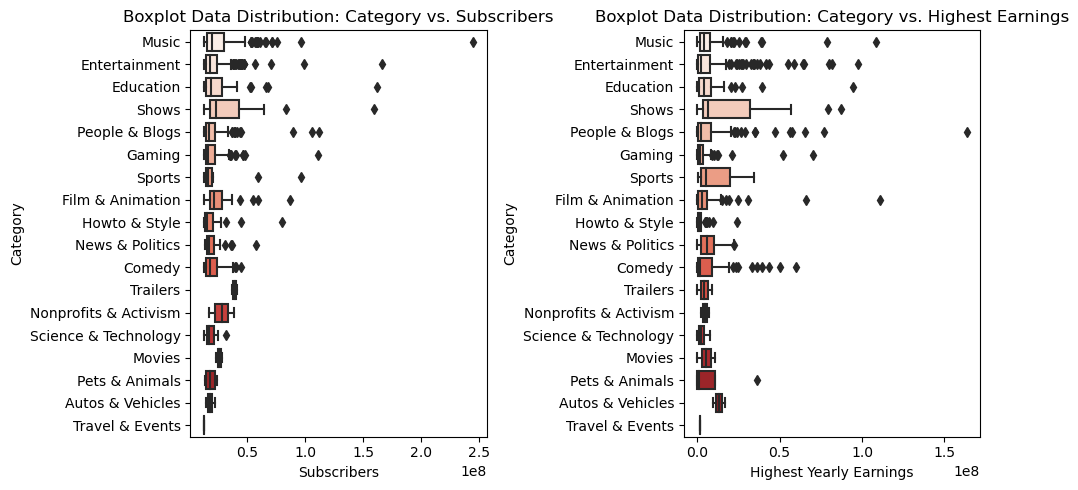

In [441]:
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='category', x='subscribers',palette='Reds')
plt.title('Boxplot Data Distribution: Category vs. Subscribers')
plt.ylabel('Category')
plt.xlabel('Subscribers')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='category', x='highest_yearly_earnings',palette='Reds')
plt.title('Boxplot Data Distribution: Category vs. Highest Earnings')
plt.ylabel('Category')
plt.xlabel('Highest Yearly Earnings')
plt.tight_layout()

plt.show()

Shows seems to have a large subscriber base, whereas popular Youtubers in some of the other categories can produce some outlier numbers. This could be due to many things, such as popularity, viral media, known superstars etc.

Shows and Sports seem to be different from the othergroups in the highest earnings distribution, this could be valuable information in deciding what to base a youtuber's channel from, if the most consistent money is to be made in certain categories, you may want to go where there is a normally distributed amount of earnings being made.

In [458]:
gr1 = df.Country.value_counts() > 1
gr1 = gr1.where(gr1 == True).dropna()


BELOW WE WILL EVALUATE COUNTRY DATA DISTRIBUTION FOR SUBSCRIBERS & EARNINGS:

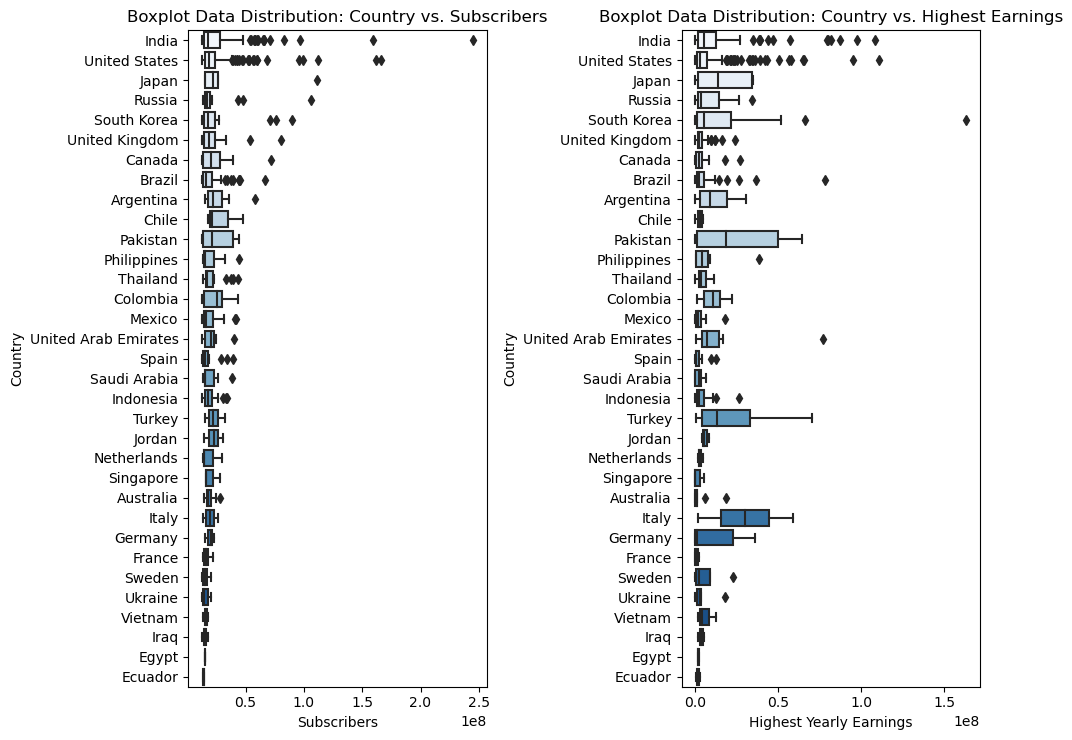

In [606]:
plt.figure(figsize=(10, 7.5))

#filtered out the singular youtubers 
plt.subplot(1, 2, 1)
#sns.boxplot(data=df, y='Country', x='subscribers',palette='Blues') #,showfliers=False)
sns.boxplot(data=df[df.Country.isin(gr1.keys())], y='Country', x='subscribers',palette='Blues') #,showfliers=False)
plt.title('Boxplot Data Distribution: Country vs. Subscribers')
plt.ylabel('Country')
plt.xlabel('Subscribers')

plt.subplot(1, 2, 2)
#sns.boxplot(data=df, y='Country', x='highest_yearly_earnings',palette='Blues')
sns.boxplot(data=df[df.Country.isin(gr1.keys())], y='Country', x='highest_yearly_earnings',palette='Blues')
plt.title('Boxplot Data Distribution: Country vs. Highest Earnings')
plt.ylabel('Country')
plt.xlabel('Highest Yearly Earnings')
plt.tight_layout()

plt.show()

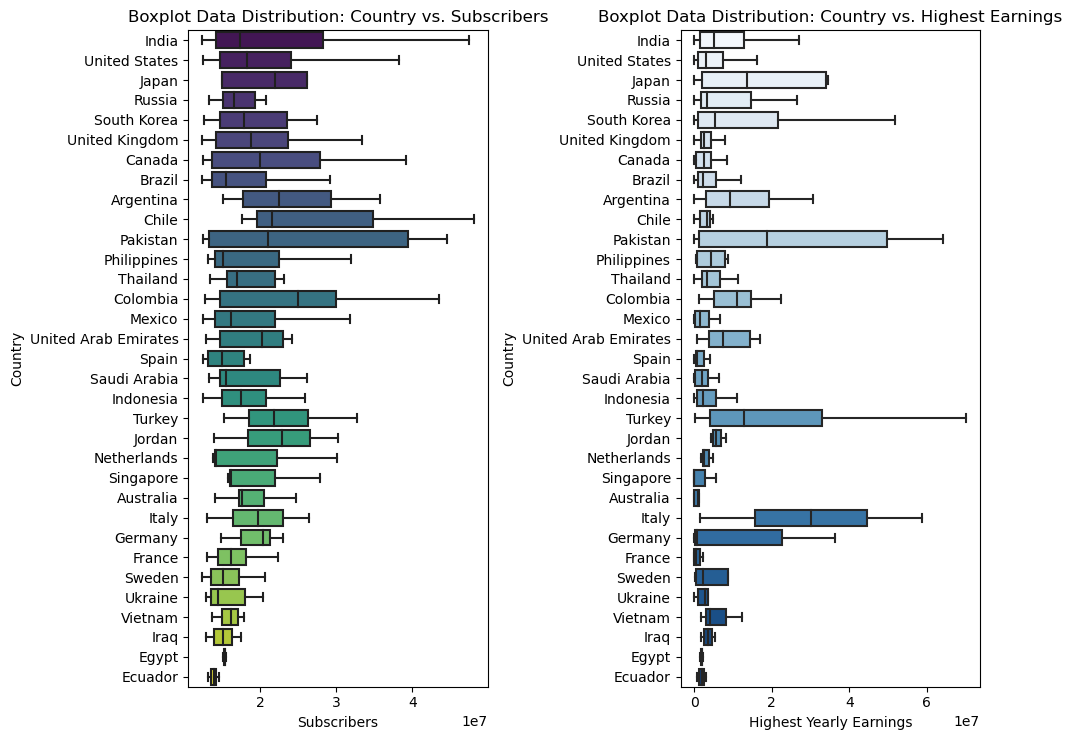

In [723]:
plt.figure(figsize=(10, 7.5))

#filtered out the singular youtubers and removed outliers
plt.subplot(1, 2, 1)
#sns.boxplot(data=df, y='Country', x='subscribers',palette='Blues') #,showfliers=False)
sns.boxplot(data=df[df.Country.isin(gr1.keys())], y='Country', x='subscribers', showfliers=False, palette='viridis') #,showfliers=False)
plt.title('Boxplot Data Distribution: Country vs. Subscribers')
plt.ylabel('Country')
plt.xlabel('Subscribers')

plt.subplot(1, 2, 2)
#sns.boxplot(data=df, y='Country', x='highest_yearly_earnings',palette='Blues')
sns.boxplot(data=df[df.Country.isin(gr1.keys())], y='Country', x='highest_yearly_earnings', showfliers= False, palette='Blues')
plt.title('Boxplot Data Distribution: Country vs. Highest Earnings')
plt.ylabel('Country')
plt.xlabel('Highest Yearly Earnings')
plt.tight_layout()

plt.show()

In [622]:
group_medians=df[df.Country.isin(gr1.keys())].groupby(['Country'])['subscribers'].median().sort_values(ascending=False)

Country
Colombia                25000000.0
Jordan                  22900000.0
Argentina               22400000.0
Japan                   22000000.0
Turkey                  21850000.0
Chile                   21500000.0
Pakistan                21050000.0
Germany                 20300000.0
United Arab Emirates    20200000.0
Canada                  20000000.0
Italy                   19700000.0
United Kingdom          18800000.0
United States           18300000.0
South Korea             17850000.0
Australia               17600000.0
Indonesia               17400000.0
India                   17300000.0
Thailand                16900000.0
Russia                  16500000.0
Singapore               16200000.0
Vietnam                 16200000.0
France                  16100000.0
Mexico                  16100000.0
Brazil                  15550000.0
Saudi Arabia            15500000.0
Egypt                   15300000.0
Philippines             15150000.0
Iraq                    15100000.0
Sweden      

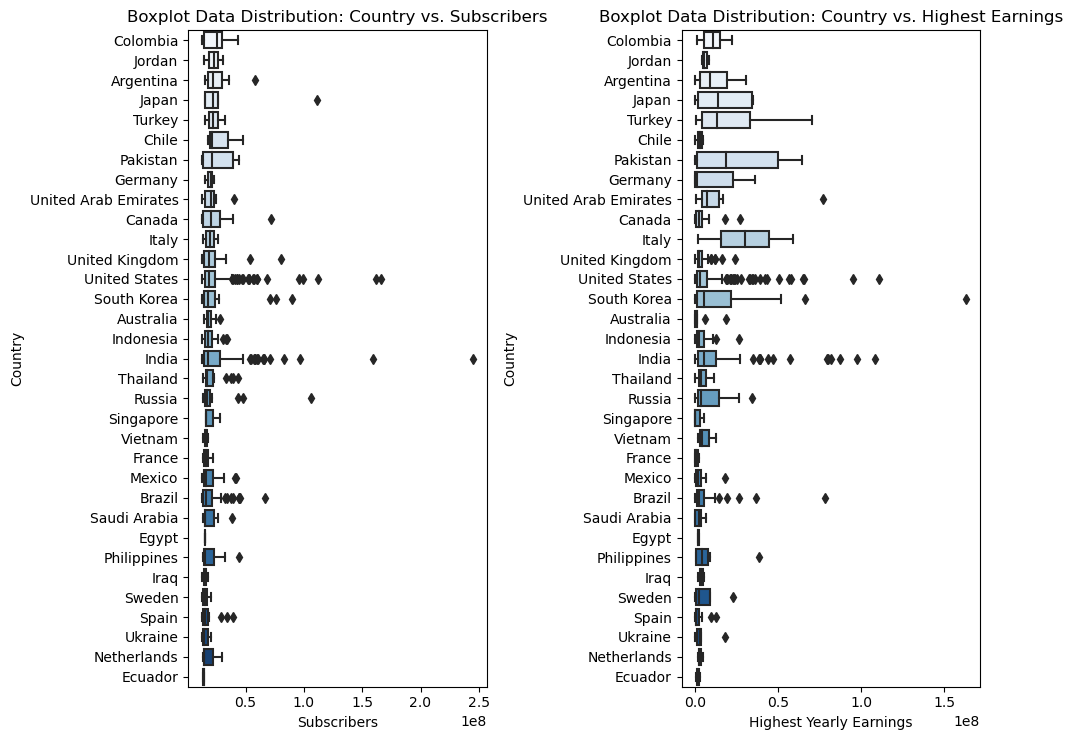

In [626]:
plt.figure(figsize=(10, 7.5))


#filtered out the singular youtubers and looking to sort by descending median subscribers
plt.subplot(1, 2, 1)
#sns.boxplot(data=df, y='Country', x='subscribers',palette='Blues') #,showfliers=False)
sns.boxplot(data=df[df.Country.isin(gr1.keys())], y='Country', x='subscribers',palette='Blues',order=group_medians.index) #,showfliers=False)
plt.title('Boxplot Data Distribution: Country vs. Subscribers')
plt.ylabel('Country')
plt.xlabel('Subscribers')

plt.subplot(1, 2, 2)
#sns.boxplot(data=df, y='Country', x='highest_yearly_earnings',palette='Blues')
sns.boxplot(data=df[df.Country.isin(gr1.keys())], y='Country', x='highest_yearly_earnings',palette='Blues', order=group_medians.index)
plt.title('Boxplot Data Distribution: Country vs. Highest Earnings')
plt.ylabel('Country')
plt.xlabel('Highest Yearly Earnings')
plt.tight_layout()

plt.show()

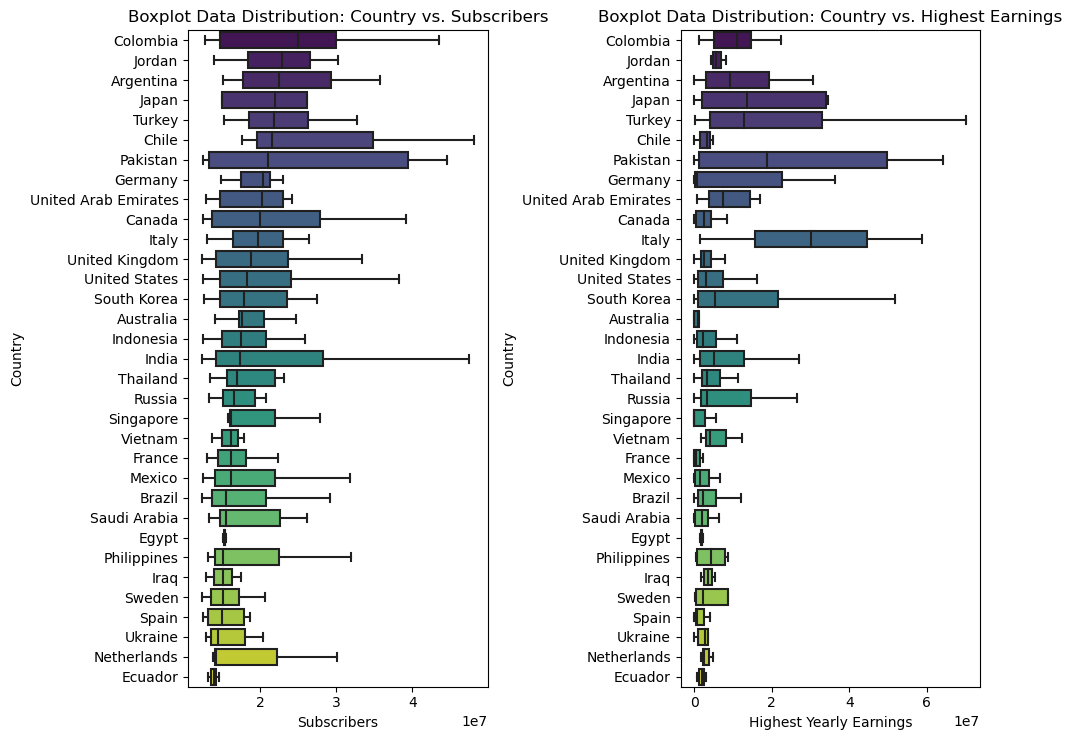

In [724]:
plt.figure(figsize=(10, 7.5))


#filtered out the singular youtubers and looking to sort by descending median subscribers
plt.subplot(1, 2, 1)
#sns.boxplot(data=df, y='Country', x='subscribers',palette='Blues') #,showfliers=False)
sns.boxplot(data=df[df.Country.isin(gr1.keys())], y='Country', x='subscribers',showfliers = False,palette='viridis',order=group_medians.index) #,showfliers=False)
plt.title('Boxplot Data Distribution: Country vs. Subscribers')
plt.ylabel('Country')
plt.xlabel('Subscribers')

plt.subplot(1, 2, 2)
#sns.boxplot(data=df, y='Country', x='highest_yearly_earnings',palette='Blues')
sns.boxplot(data=df[df.Country.isin(gr1.keys())], y='Country', x='highest_yearly_earnings',showfliers = False,palette='viridis',order=group_medians.index)
plt.title('Boxplot Data Distribution: Country vs. Highest Earnings')
plt.ylabel('Country')
plt.xlabel('Highest Yearly Earnings')
plt.tight_layout()

plt.show()

In [628]:
groupearnings_medians=df[df.Country.isin(gr1.keys())].groupby(['Country'])['highest_yearly_earnings'].median().sort_values(ascending=False)

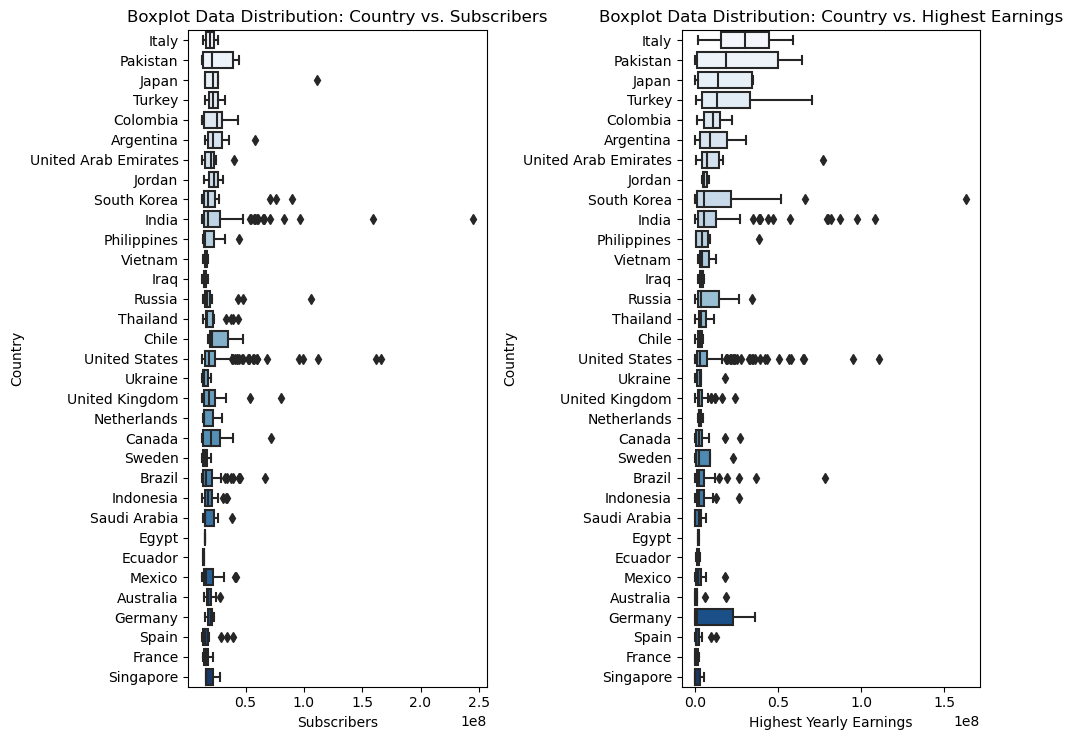

In [630]:
plt.figure(figsize=(10, 7.5))


#filtered out the singular youtubers and looking to sort by descending median subscribers
plt.subplot(1, 2, 1)
#sns.boxplot(data=df, y='Country', x='subscribers',palette='Blues') #,showfliers=False)
sns.boxplot(data=df[df.Country.isin(gr1.keys())], y='Country', x='subscribers',palette='Blues',order=groupearnings_medians.index) #,showfliers=False)
plt.title('Boxplot Data Distribution: Country vs. Subscribers')
plt.ylabel('Country')
plt.xlabel('Subscribers')

plt.subplot(1, 2, 2)
#sns.boxplot(data=df, y='Country', x='highest_yearly_earnings',palette='Blues')
sns.boxplot(data=df[df.Country.isin(gr1.keys())], y='Country', x='highest_yearly_earnings',palette='Blues', order=groupearnings_medians.index)
plt.title('Boxplot Data Distribution: Country vs. Highest Earnings')
plt.ylabel('Country')
plt.xlabel('Highest Yearly Earnings')
plt.tight_layout()

plt.show()

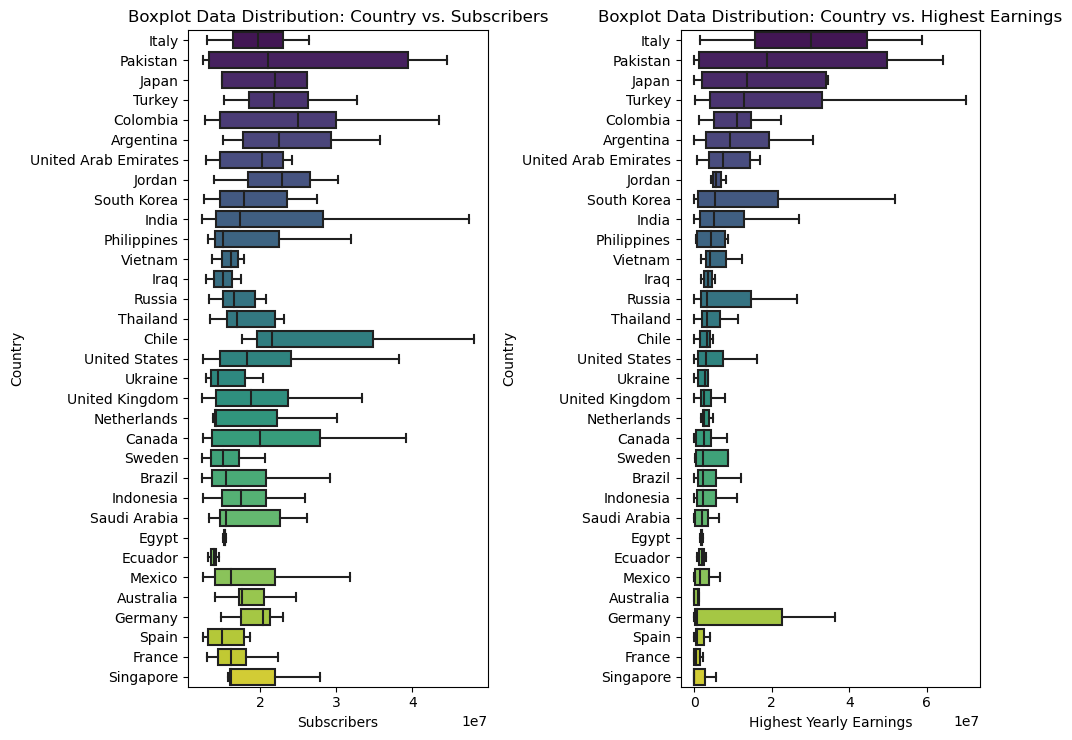

In [725]:
plt.figure(figsize=(10, 7.5))


#filtered out the singular youtubers and looking to sort by descending median subscribers
plt.subplot(1, 2, 1)
#sns.boxplot(data=df, y='Country', x='subscribers',palette='Blues') #,showfliers=False)
sns.boxplot(data=df[df.Country.isin(gr1.keys())], y='Country', x='subscribers',showfliers = False,palette='viridis',order=groupearnings_medians.index) #,showfliers=False)
plt.title('Boxplot Data Distribution: Country vs. Subscribers')
plt.ylabel('Country')
plt.xlabel('Subscribers')

plt.subplot(1, 2, 2)
#sns.boxplot(data=df, y='Country', x='highest_yearly_earnings',palette='Blues')
sns.boxplot(data=df[df.Country.isin(gr1.keys())], y='Country', x='highest_yearly_earnings',showfliers = False,palette='viridis',order=groupearnings_medians.index)
plt.title('Boxplot Data Distribution: Country vs. Highest Earnings')
plt.ylabel('Country')
plt.xlabel('Highest Yearly Earnings')
plt.tight_layout()

plt.show()

What jumped out to me on these graphs were Germany, Italy, Turkey, Pakistan and South Korea, which showed a huge jump in the distribution of highest yearly earnings as compared to those with a similar distribution of subscribers. Data like this makes me believe that there is a nationalistic or location factor in the impact on earnings. Why is Turkey so different from Jordan? Why is South Korea so different than the United Kingdom?

In [763]:
df['x'] = 1
df = df.rename({'x':'youtuber_count'},axis=1)
countrydf = df.groupby('Country').sum().sort_values('subscribers',ascending=False)
countrydf.head(10)

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_97684/2376875984.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,earnings_per_sub,last_30day_view_conversion,links,overall_view_conversion,youtuber_count
Country,,,,,,,,,,,,,,,,,,,,,,,,,,
United States,150984.0,7.084500e+09,3.690292e+12,1299605.0,68829154.0,153348.0,126564.0,5.362141e+10,11351605.11,1.816076e+08,1.360415e+08,2.179397e+09,68915203.0,623631.0,4623.0,27430.2,1.020825e+11,4571.70,8.417620e+10,11535.064640,-29766.709101,96.851000,1.789411,37,8808.979858,311
India,83531.0,4.333400e+09,2.299037e+12,3730053.0,17644342.0,37002.0,22688.0,3.974132e+10,9840719.25,1.572862e+08,1.179759e+08,1.889354e+09,59740000.0,340309.0,2711.0,4720.8,2.295582e+11,900.48,7.913330e+10,3459.738912,13265.763840,69.903893,0.397329,25,1.308250,169
Brazil,36187.0,1.221800e+09,4.812090e+11,168178.0,4293900.0,6961.0,9950.0,1.383949e+10,1811314.00,2.884909e+07,2.177564e+07,3.478070e+08,7200000.0,122765.0,1010.0,3180.6,1.317868e+10,748.96,1.136098e+10,-882.570248,-3219.367360,16.656028,0.058896,1,0.327876,62
United Kingdom,22111.0,9.174000e+08,4.305665e+11,86816.0,10830787.0,12581.0,19156.0,3.664467e+09,916087.48,1.464408e+07,1.100671e+07,1.759100e+08,4801130.0,86454.0,712.0,2580.0,2.873879e+09,165.55,2.404058e+09,2381.256193,-147.746839,9.207987,0.144399,0,0.122947,43
Mexico,18527.0,6.269000e+08,1.982199e+11,33410.0,15009450.0,17159.0,23770.0,1.860700e+09,449684.00,7.218781e+06,5.388860e+06,8.625057e+07,3000000.0,66457.0,512.0,1326.6,4.158463e+09,112.86,3.386686e+09,779.938533,-3384.241872,5.277333,0.082467,0,0.153290,33
Indonesia,14787.0,5.341000e+08,1.510107e+11,678321.0,4376602.0,4518.0,8471.0,4.742892e+09,612711.02,9.857800e+06,7.311100e+06,1.175791e+08,12400001.0,56424.0,486.0,1016.4,7.565710e+09,131.32,4.242272e+09,-22.099700,3189.797156,5.777445,0.077238,0,1.352772,28
South Korea,8712.0,4.997000e+08,2.343087e+11,130472.0,33396.0,162.0,1355.0,8.148280e+09,2011242.00,3.212310e+07,2.406520e+07,3.862286e+08,10500000.0,36215.0,243.0,1603.1,8.790547e+08,70.55,7.158142e+08,610.431869,2172.037674,19.857587,0.232533,8,0.063604,18
Russia,8218.0,4.072000e+08,2.329963e+11,19558.0,7689769.0,3415.0,6646.0,2.894754e+09,723602.00,1.157253e+07,8.660023e+06,1.387213e+08,5100010.0,32224.0,275.0,1310.4,2.309977e+09,73.44,1.722942e+09,984.384160,1685.100096,7.268942,0.044511,5,33.986439,16
Thailand,8629.0,3.865000e+08,2.643180e+11,858953.0,4066125.0,4164.0,6847.0,1.711991e+09,412500.01,6.602600e+06,4.952200e+06,7.934850e+07,1800000.0,36199.0,230.0,887.4,1.253260e+09,13.50,6.353028e+08,285.660576,1817.865738,4.234486,0.024687,0,0.033767,18


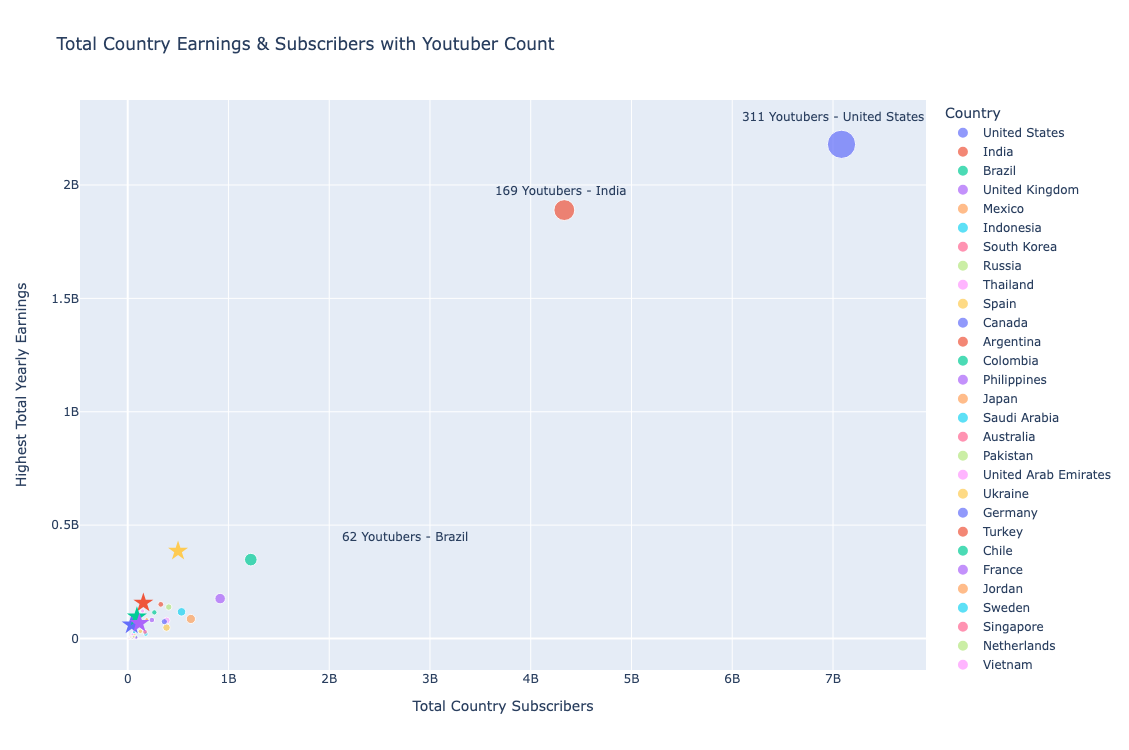

In [530]:
px.scatter(countrydf, 
           x='subscribers',y='highest_yearly_earnings',
               size='youtuber_count',
               color=countrydf.index,
                labels = {'subscribers': 'Total Country Subscribers',
                          'highest_yearly_earnings': 'Highest Total Yearly Earnings'},
                     title ='Total Country Earnings & Subscribers with Youtuber Count').update_layout(
                                                                                autosize=False, height=750, width=700).add_annotation(
                                                                                                                               text='311 Youtubers - United States',  x=7000000000,y=2300000000, showarrow=False).add_annotation(
                                                                                                                               text='169 Youtubers - India', x=4300000000,y=1975000000,showarrow=False).add_annotation(
                                                                                                                               text='62 Youtubers - Brazil', x=2750000000,y=450000000,showarrow=False).add_trace(
    go.Scatter(x=[countrydf[countrydf.index=='South Korea'].subscribers[0]], y=[countrydf[countrydf.index=='South Korea'].highest_yearly_earnings[0]], mode = 'markers',
                         marker_symbol = 'star',
                         marker_size = 15)).add_trace(
    go.Scatter(x=[countrydf[countrydf.index=='Italy'].subscribers[0]], y=[countrydf[countrydf.index=='Italy'].highest_yearly_earnings[0]], mode = 'markers',
                         marker_symbol = 'star',
                         marker_size = 15)).add_trace(
    go.Scatter(x=[countrydf[countrydf.index=='Pakistan'].subscribers[0]], y=[countrydf[countrydf.index=='Pakistan'].highest_yearly_earnings[0]], mode = 'markers',
                         marker_symbol = 'star',
                         marker_size = 15)).add_trace(
    go.Scatter(x=[countrydf[countrydf.index=='Turkey'].subscribers[0]], y=[countrydf[countrydf.index=='Turkey'].highest_yearly_earnings[0]], mode = 'markers',
                         marker_symbol = 'star',
                         marker_size = 15)).add_trace(
    go.Scatter(x=[countrydf[countrydf.index=='Germany'].subscribers[0]], y=[countrydf[countrydf.index=='Germany'].highest_yearly_earnings[0]], mode = 'markers',
                         marker_symbol = 'star',
                         marker_size = 15))

The 5 countries; Germany, Italy, Turkey, Pakistan and South Korea, do not seem to be out of the norm here either, reinforcing the point that location can have an impact on our success as a Youtuber. I will now dig deeper into one of these countries, we'll take South Korea for now, they seemed to have a solid distribution with 18 youtubers which will give us a good set of data to look at.

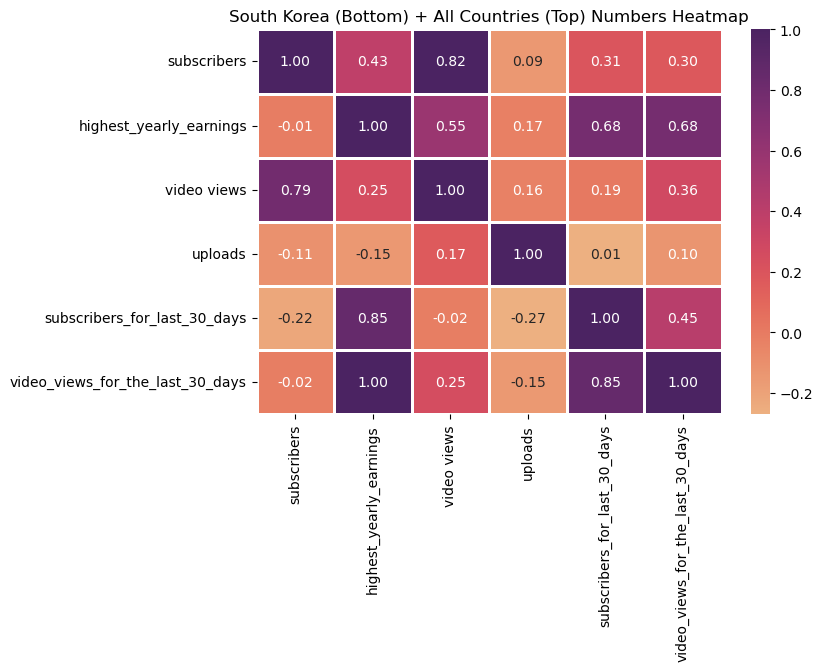

In [699]:
skorea_df = df[df['Country'] == 'South Korea']
sub_skorea_df = skorea_df[['Youtuber','category','Country','subscribers','highest_yearly_earnings','video views', 'uploads', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days']]
skorea_numbersdf = sub_skorea_df[sub_skorea_df['Country']=='South Korea'].select_dtypes(include=['number'])  
skorea_numbers_heatmap = skorea_numbersdf.corr()
plt.figure(figsize=(7.5,5))
matrix3 = np.triu(np.ones_like(skorea_numbers_heatmap, dtype=bool))
matrix4 = np.tril(np.ones_like(subset_numbers_heatmap, dtype=bool))
np.fill_diagonal(matrix3,False)
sns.heatmap(skorea_numbers_heatmap, annot=True, cmap='flare', fmt=".2f",linewidths=1,mask = matrix3)
sns.heatmap(subset_numbers_heatmap, annot=True, cmap='flare', fmt=".2f",linewidths=1,cbar=False, mask = matrix4)
plt.title('South Korea (Bottom) + All Countries (Top) Numbers Heatmap')
plt.show()

In [782]:
categorydf = df.groupby('category').sum().sort_values('highest_yearly_earnings',ascending=True)
categorydf.head()

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_97684/3682730962.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,earnings_per_sub,last_30day_view_conversion,links,overall_view_conversion,youtuber_count
category,,,,,,,,,,,,,,,,,,,,,,,,,,
Travel & Events,957.0,12500000.0,3.140883e+09,766.0,2691.0,33.0,171.0,31007000.0,7800.0,124000.0,93000.0,1500000.0,0.0,2015.0,6.0,40.2,1.260140e+08,3.42,102626859.0,23.634501,-102.552784,0.120000,0.000000,0,0.003980,1
Trailers,171.0,78000000.0,3.326272e+10,13678.0,360.0,46.0,59.0,312404000.0,45200.0,723800.0,542800.0,8700000.0,600000.0,4014.0,43.0,56.2,2.732836e+09,10.72,942063056.0,41.187368,157.925760,0.210145,0.003732,0,0.004689,2
Nonprofits & Activism,628.0,55500000.0,1.086291e+10,205824.0,3075.0,54.0,3.0,195181000.0,48800.0,780800.0,585500.0,9400000.0,500000.0,4025.0,33.0,139.5,5.407989e+08,26.78,453904669.0,22.855236,-147.638171,0.483030,0.004866,0,0.010056,2
Movies,482.0,51300000.0,1.538326e+10,7106.0,1680.0,106.0,33.0,346201000.0,56800.0,909400.0,682100.0,10900000.0,800000.0,4023.0,40.0,56.2,2.732836e+09,10.72,942063056.0,41.187368,157.925760,0.383803,0.004723,0,0.007126,2
Autos & Vehicles,1121.0,35700000.0,1.500346e+10,3797.0,1683.0,22.0,91.0,546433000.0,136600.0,2172700.0,1679500.0,26300000.0,800000.0,4020.0,14.0,88.1,2.223299e+08,14.43,191721385.0,9.189072,1.922538,1.636229,0.002968,0,0.004859,2


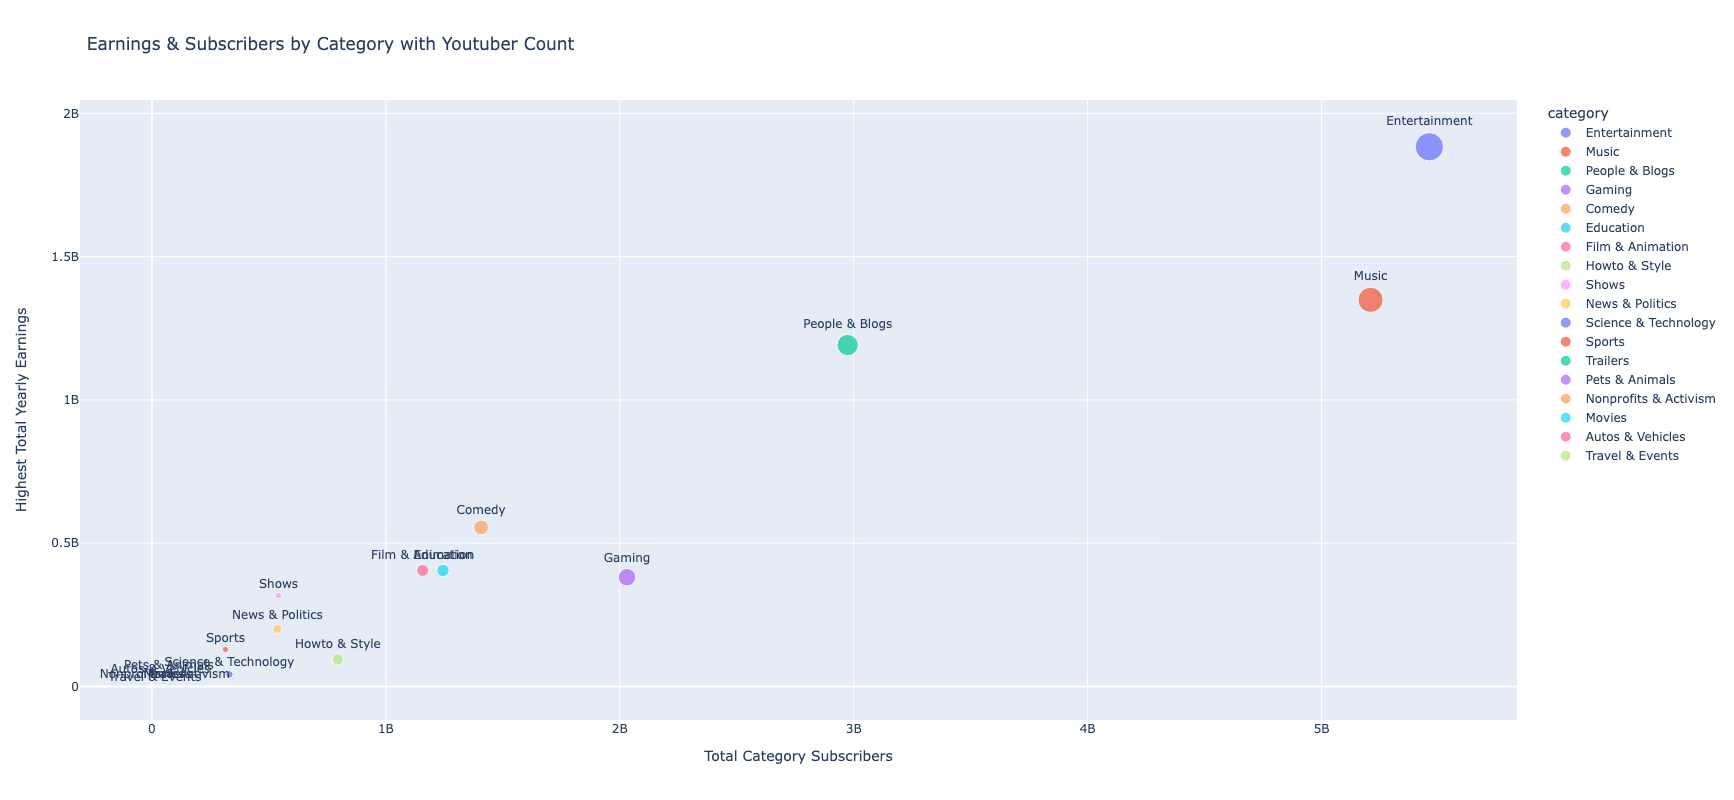

In [771]:
px.scatter(categorydf, x='subscribers', y='highest_yearly_earnings', size ='youtuber_count',color=categorydf.index,text=categorydf.index, labels = {'subscribers': 'Total Category Subscribers',
                          'highest_yearly_earnings': 'Highest Total Yearly Earnings'},
                     title ='Earnings & Subscribers by Category with Youtuber Count').update_layout(
                                                                                autosize=False, height=800, width=1000).update_traces(textposition='top center')

<function matplotlib.pyplot.show(close=None, block=None)>

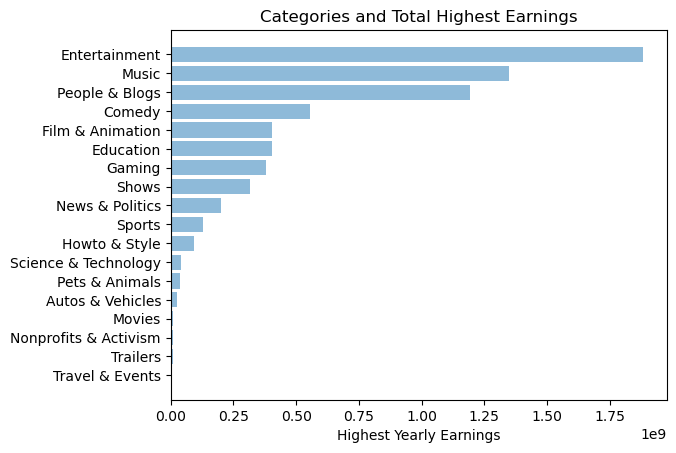

In [809]:
plt.barh(categorydf.index, categorydf.highest_yearly_earnings,alpha=0.5)
plt.title('Categories and Total Highest Earnings')
plt.xlabel('Highest Yearly Earnings')
plt.show

In [810]:
categorydf['per_youtuber_earnings'] = categorydf.highest_yearly_earnings/categorydf.youtuber_count

In [811]:
categorydf['per_youtuber_earnings'].sort_values(ascending=False)

category
Shows                    2.438462e+07
Autos & Vehicles         1.315000e+07
Sports                   1.073052e+07
Pets & Animals           9.575086e+06
Film & Animation         8.797580e+06
Education                8.426465e+06
People & Blogs           8.272868e+06
Comedy                   7.923786e+06
News & Politics          7.707753e+06
Entertainment            7.384843e+06
Music                    6.645988e+06
Movies                   5.450000e+06
Nonprofits & Activism    4.700000e+06
Trailers                 4.350000e+06
Gaming                   3.889056e+06
Science & Technology     2.342390e+06
Howto & Style            2.303871e+06
Travel & Events          1.500000e+06
Name: per_youtuber_earnings, dtype: float64

In [799]:
categorydf['earning_percentage'] = categorydf.highest_yearly_earnings/(sum(categorydf.highest_yearly_earnings))

In [807]:
categorydf['earning_percentage'].sort_values(ascending=False)

category
Entertainment            26.724761
Music                    19.146437
People & Blogs           16.906395
Comedy                    7.871603
Film & Animation          5.743194
Education                 5.740095
Gaming                    5.408822
Shows                     4.498748
News & Politics           2.844026
Sports                    1.827404
Howto & Style             1.340523
Science & Technology      0.598362
Pets & Animals            0.543544
Autos & Vehicles          0.373240
Movies                    0.154689
Nonprofits & Activism     0.133401
Trailers                  0.123467
Travel & Events           0.021287
Name: earning_percentage, dtype: float64

It would be interesting to see if the top 10 in subscribers are the same or very similiar to the top 10 in highest_yearly_earnings. Or if the previous analyses of category and country will play a part in who rounds out the top 10.

In [1001]:
#top10_subscribership = df[['Youtuber','subscribers','Country','category','video views','uploads','highest_yearly_earnings']].sort_values(by=['subscribers'],ascending=False).head(10)
top10_subscribership = df[['Youtuber','category','Country','subscribers','highest_yearly_earnings','video views', 'uploads', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days','earnings_per_sub','last_30day_view_conversion','overall_view_conversion','links']].sort_values(by=['subscribers'],ascending=False).head(10)
top10_subscribership

,Youtuber,category,Country,subscribers,highest_yearly_earnings,video views,uploads,subscribers_for_last_30_days,video_views_for_the_last_30_days,earnings_per_sub,last_30day_view_conversion,overall_view_conversion,links
0,T-Series,Music,India,245000000.0,108400000.0,2.280000e+11,20082.0,2000000.0,2.258000e+09,0.442449,0.000886,0.001075,5
2,MrBeast,Entertainment,United States,166000000.0,64700000.0,2.836884e+10,741.0,8000000.0,1.348000e+09,0.389759,0.005935,0.005851,2
3,Cocomelon - Nursery Rhymes,Education,United States,162000000.0,94800000.0,1.640000e+11,966.0,1000000.0,1.975000e+09,0.585185,0.000506,0.000988,6
4,SET India,Shows,India,159000000.0,87500000.0,1.480000e+11,116536.0,1000000.0,1.824000e+09,0.550314,0.000548,0.001074,5
6,ýýý Kids Diana Show,People & Blogs,United States,112000000.0,35100000.0,9.324704e+10,1111.0,NaN,7.316740e+08,0.313393,NaN,0.001201,8
7,PewDiePie,Gaming,Japan,111000000.0,1900000.0,2.905804e+10,4716.0,NaN,3.918400e+07,0.017117,NaN,0.003820,2
8,Like Nastya,People & Blogs,Russia,106000000.0,2300000.0,9.047906e+10,493.0,100000.0,4.894700e+07,0.021698,0.002043,0.001172,5
9,Vlad and Niki,Entertainment,United States,98900000.0,27900000.0,7.718017e+10,574.0,600000.0,5.805740e+08,0.282103,0.001033,0.001281,2
10,Zee Music Company,Music,India,96700000.0,38600000.0,5.785629e+10,8548.0,1100000.0,8.036130e+08,0.399173,0.001369,0.001671,4
11,WWE,Sports,United States,96000000.0,34300000.0,7.742847e+10,70127.0,600000.0,7.146140e+08,0.357292,0.000840,0.001240,6


In [998]:
#top10_earnings = df[['Youtuber','highest_yearly_earnings','Country','category','video views','uploads','subscribers']].sort_values(by=['highest_yearly_earnings'],ascending=False).head(10)
top10_earnings = df[['Youtuber','category','Country','subscribers','highest_yearly_earnings','video views', 'uploads', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days','earnings_per_sub','last_30day_view_conversion','overall_view_conversion','links']].sort_values(by=['highest_yearly_earnings'],ascending=False).head(10)
top10_earnings

,Youtuber,category,Country,subscribers,highest_yearly_earnings,video views,uploads,subscribers_for_last_30_days,video_views_for_the_last_30_days,earnings_per_sub,last_30day_view_conversion,overall_view_conversion,links
495,ýýýýýýýýý KIMPRO,People & Blogs,South Korea,17700000.0,163400000.0,1.920670e+10,1646.0,3200000.0,3.404000e+09,9.231638,0.000940,0.000922,1
417,DaFuq!?Boom!,Film & Animation,United States,19600000.0,110600000.0,7.906182e+09,214.0,6700000.0,2.304000e+09,5.642857,0.002908,0.002479,3
0,T-Series,Music,India,245000000.0,108400000.0,2.280000e+11,20082.0,2000000.0,2.258000e+09,0.442449,0.000886,0.001075,5
302,KL BRO Biju Rithvik,Entertainment,India,22800000.0,97600000.0,1.798835e+10,1841.0,3200000.0,2.033000e+09,4.280702,0.001574,0.001267,0
3,Cocomelon - Nursery Rhymes,Education,United States,162000000.0,94800000.0,1.640000e+11,966.0,1000000.0,1.975000e+09,0.585185,0.000506,0.000988,6
4,SET India,Shows,India,159000000.0,87500000.0,1.480000e+11,116536.0,1000000.0,1.824000e+09,0.550314,0.000548,0.001074,5
21,Zee TV,Entertainment,India,70500000.0,81900000.0,7.313905e+10,129204.0,900000.0,1.707000e+09,1.161702,0.000527,0.000964,2
139,StarPlus,Entertainment,India,32000000.0,80000000.0,2.680067e+10,44892.0,1200000.0,1.667000e+09,2.500000,0.000720,0.001194,4
15,Sony SAB,Shows,India,83000000.0,79600000.0,1.010000e+11,71270.0,1100000.0,1.657000e+09,0.959036,0.000664,0.000822,5
83,GR6 EXPLODE,Music,Brazil,38900000.0,78500000.0,2.515423e+10,3043.0,100000.0,1.635000e+09,2.017995,0.000061,0.001546,1


Just being from the US, I expected MrBeast to be in the top expected earners, however from this data that shows to not be true. Perhaps there is more money to be made in other countries?

It looks like US dominates the subscribers top 10, however India dominates the exp earnings top 10

In [919]:
#I had to keep the levels matched with the countries so they retained the same color, making a new levels alongside a 
# new categories allowed me to manually add countries without having to go through dataset merges to have all the countries in one spot
levels2 = np.array([4,0,1,1,0,1,1,1,1,5])
levels2 = np.flip(levels2)


In [902]:
categories2 = categories
categories2 = np.append(categories2, 'South Korea')
categories2 = np.append(categories2, 'Brazil')
categories2

array(['United States', 'India', 'Russia', 'Japan', 'South Korea',
       'Brazil'], dtype=object)

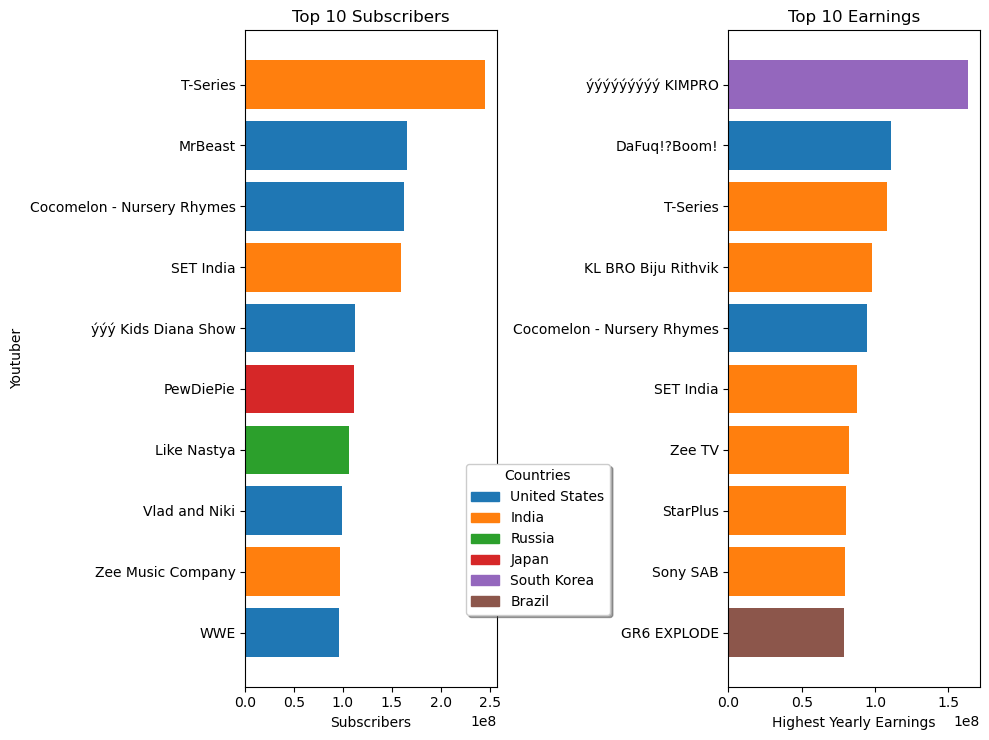

In [922]:
plt.figure(figsize=(10, 7.5))



#want to view the top 10 in subscribership and top 10 in earnings
chtop10_subscribership = top10_subscribership.sort_values(by=['subscribers'],ascending=True)
levels, categories = pd.factorize(chtop10_subscribership['Country'])
colors = [plt.cm.tab10(i) for i in levels]
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories2)]

plt.subplot(1, 2, 1)
plt.barh(chtop10_subscribership.Youtuber,chtop10_subscribership.subscribers, color=colors)
plt.title('Top 10 Subscribers')
plt.ylabel('Youtuber')
plt.xlabel('Subscribers')
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.legend(handles=handles,title='Countries',loc='best', bbox_to_anchor=(.85,.35),fancybox=True, shadow=True)

chtop10_earnings = top10_earnings.sort_values(by=['highest_yearly_earnings'],ascending=True)
colors2 = [plt.cm.tab10(i) for i in levels2]
plt.subplot(1, 2, 2)
plt.barh(chtop10_earnings.Youtuber,chtop10_earnings.highest_yearly_earnings, color=colors2)
plt.title('Top 10 Earnings')
plt.xlabel('Highest Yearly Earnings')
# plt.legend(handles=handles2,title='Countries')
# plt.legend(handles=handles2,title='Countries',loc='best', bbox_to_anchor=(.75,.25),fancybox=True, shadow=True)
plt.tight_layout()

plt.show()

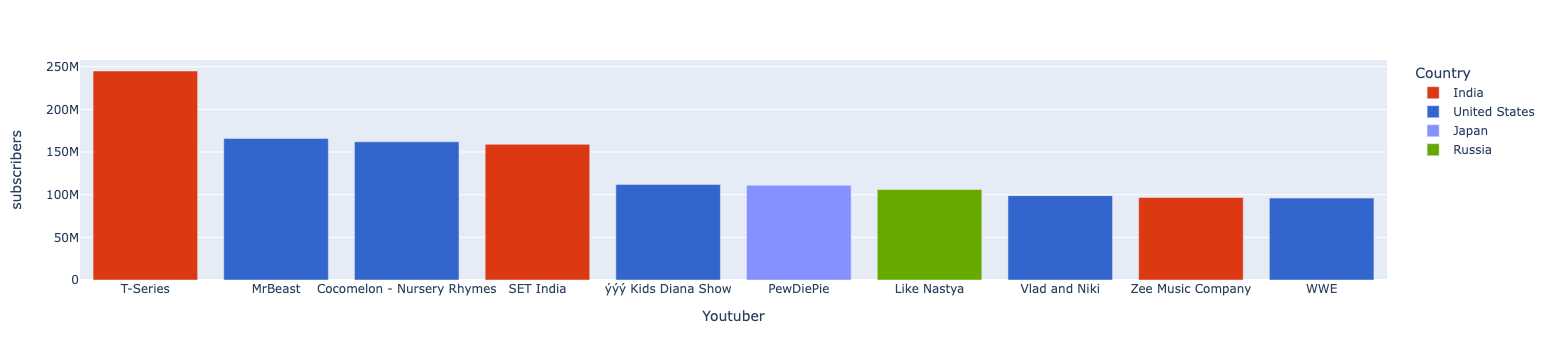

In [577]:
fig = px.bar(top10_subscribership,x='Youtuber',y='subscribers',color='Country', color_discrete_map={"India": '#DC3912', 'United States': '#3366CC', 'Japan': '#8690FF', 'Russia': '#66AA00'})
fig.update_layout(xaxis_categoryorder = 'total descending')

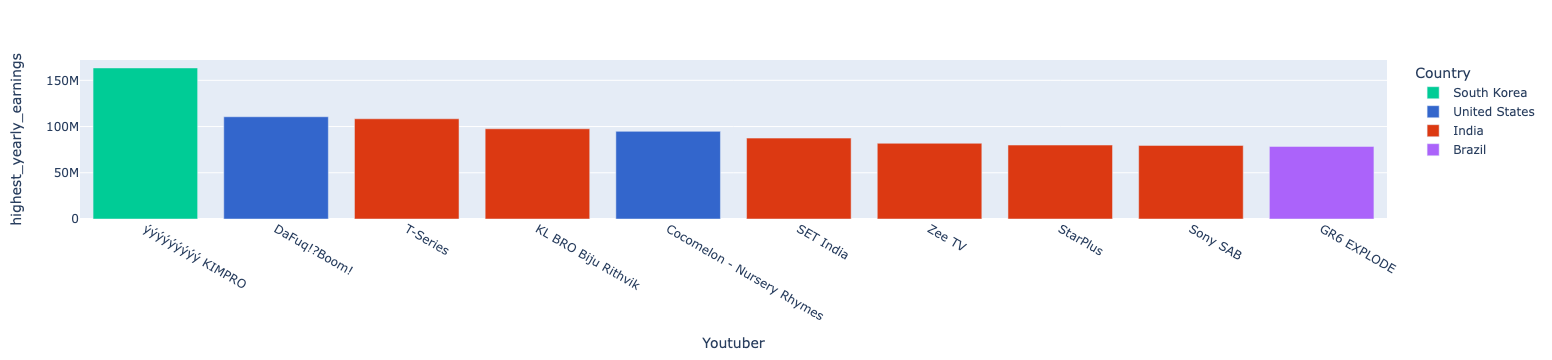

In [576]:
fig2 = px.bar(top10_earnings,x='Youtuber',y='highest_yearly_earnings',  color = 'Country', color_discrete_map={"India": '#DC3912', 'United States': '#3366CC'})
fig2.update_layout(xaxis_categoryorder = 'total descending')
fig2

This leads us to the point that it isn't all about subscribers if you are looking to make the highest earnings, there can be other variables that influence such as location. Although the US makes up 50% of the Youtubers in the top 10 subscribed, they only make up for 20% of the top 10 earners.

South Korea has the top Youtuber in earnings but none in the top subscribers. 
India has only 30% of top subscribers but 60% of the top earners.

Begs to ask the question, what are the main factors in both subscribership & est. highest earnings?


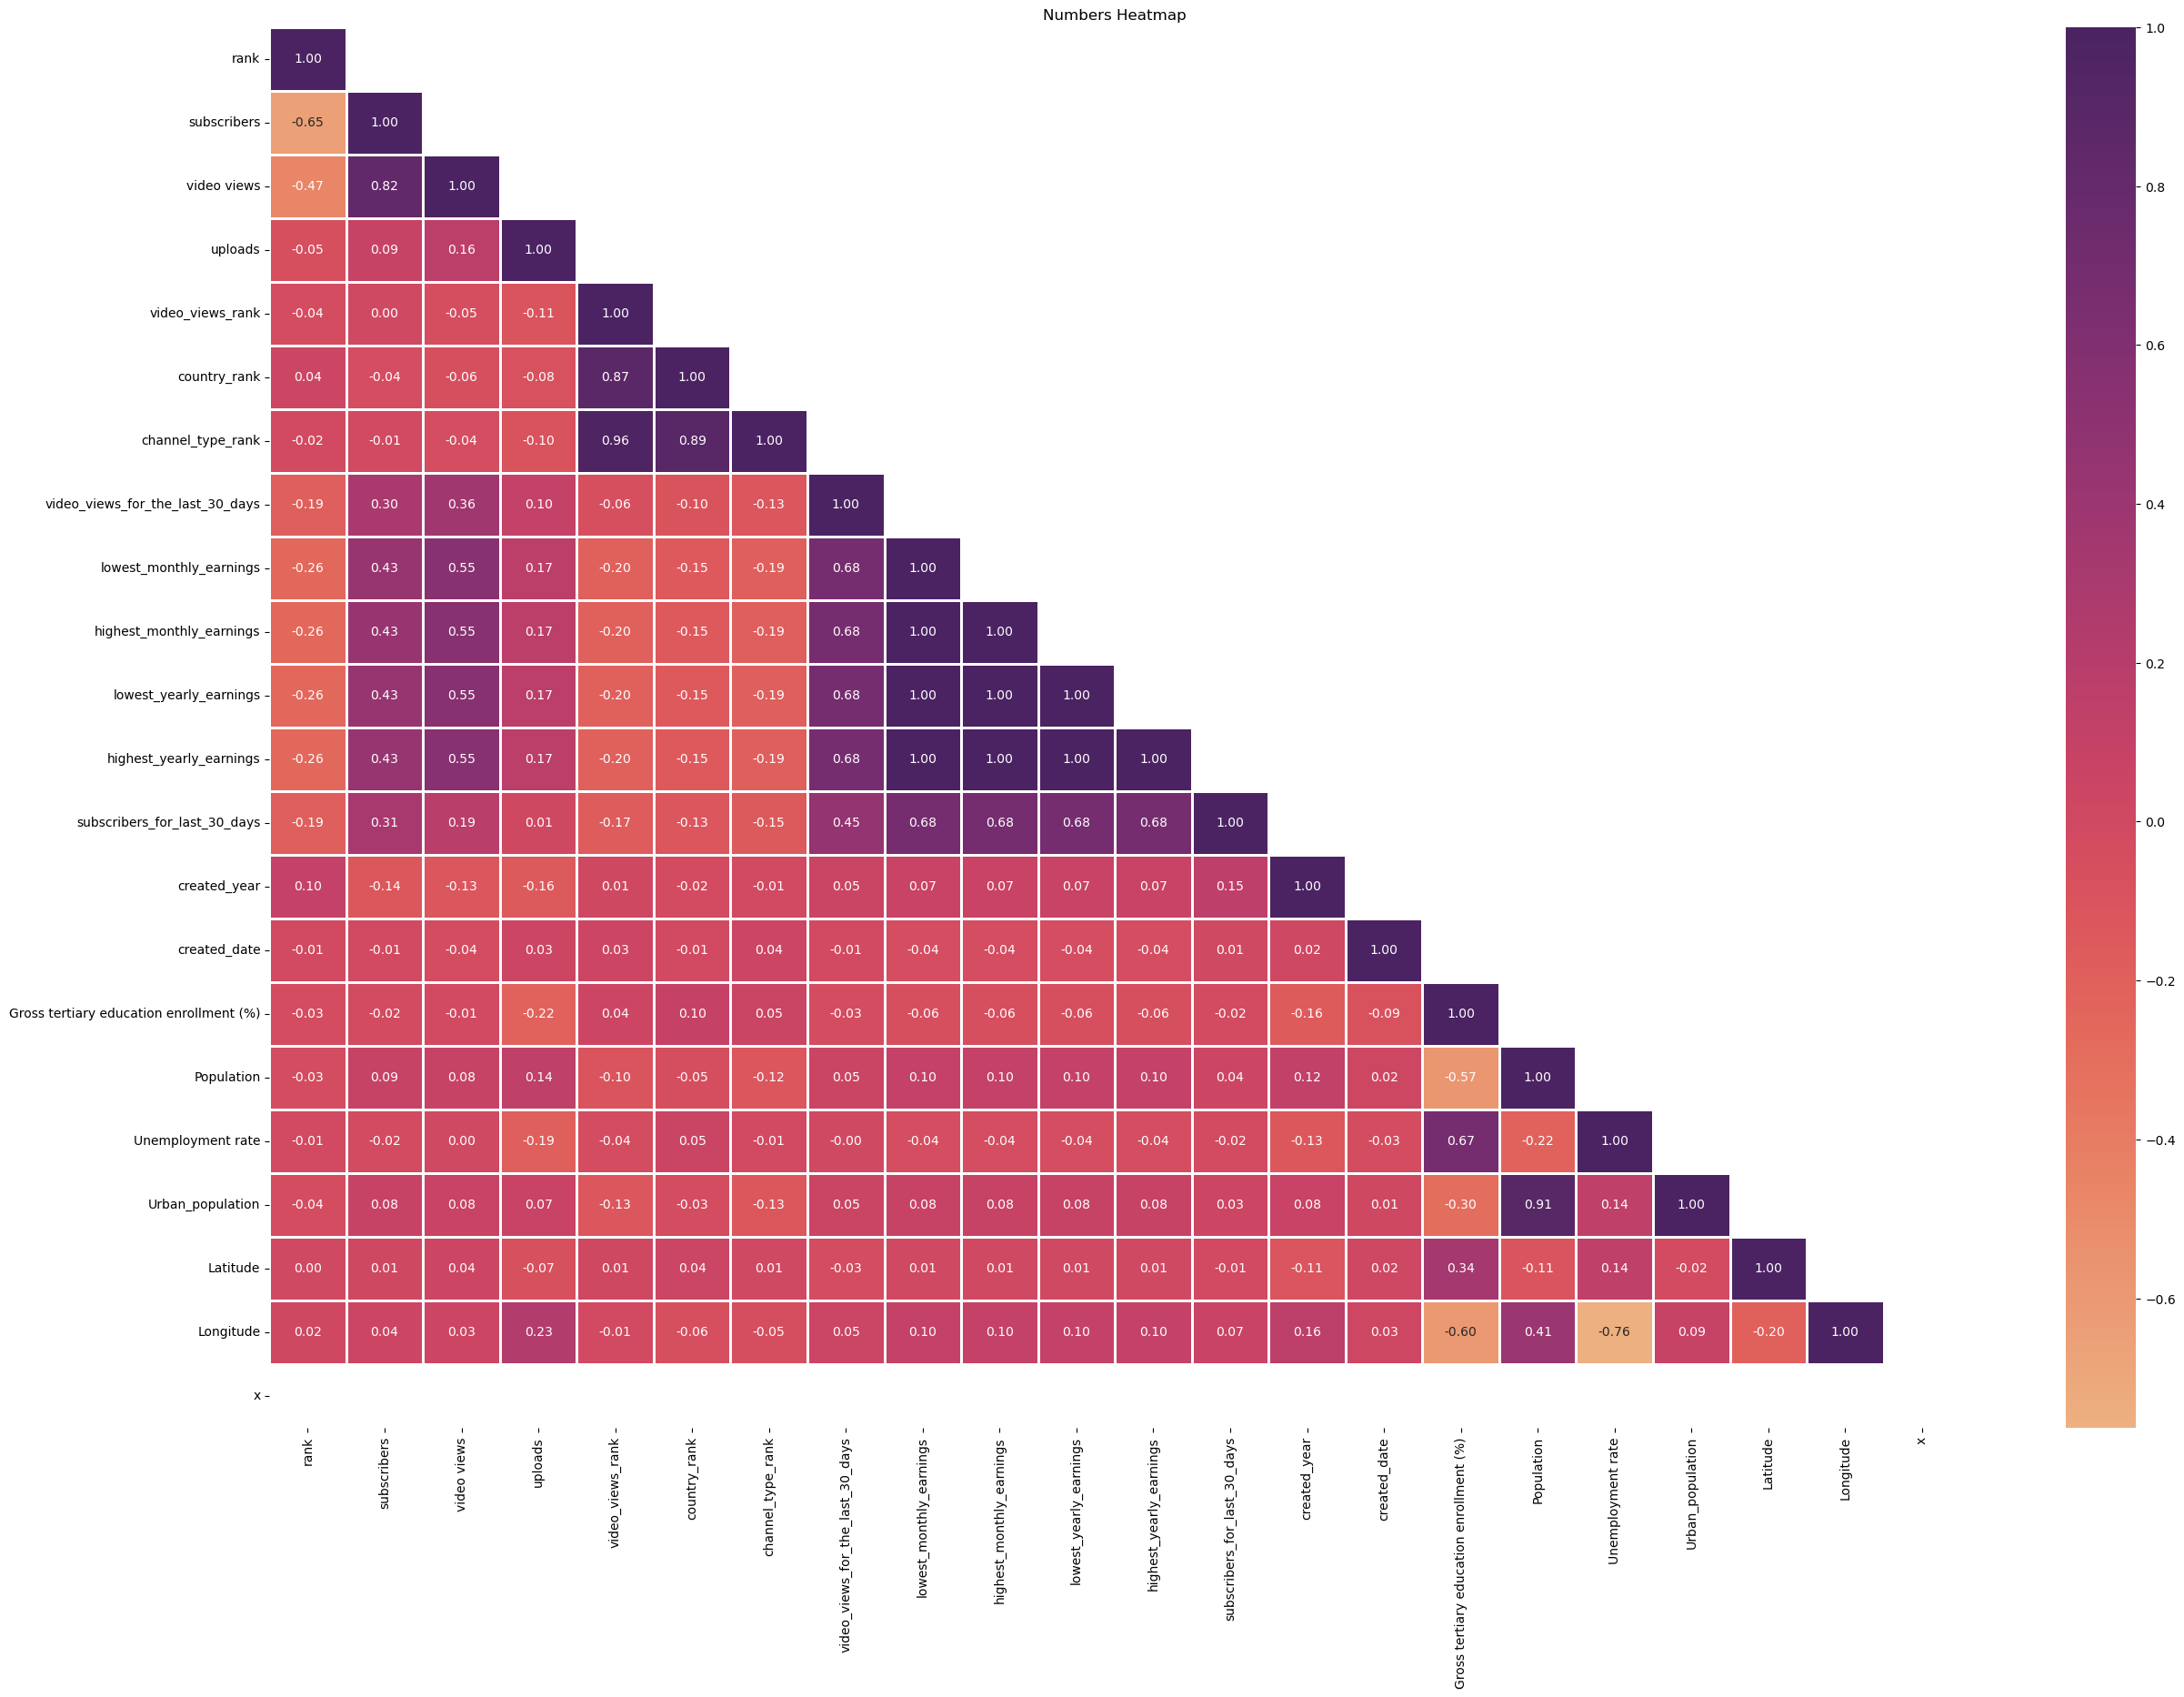

In [184]:
numbersdf = df.select_dtypes(include=['number'])  
numbers_heatmap = numbersdf.corr()
plt.figure(figsize=(30,20))
matrix0 = np.triu(np.ones_like(numbers_heatmap, dtype=bool))
np.fill_diagonal(matrix0,False)
sns.heatmap(numbers_heatmap, annot=True, cmap='flare', fmt=".2f",linewidths=1,mask = matrix0)
plt.title('Numbers Heatmap')
plt.show()

After looking at this correlation heat map, I filter out the most impactful variables to subscribers and highest_monthly_earnings. In additon, I added some interesting variables that didn't have much of an effect.


In [164]:
#creating a subset with the variables I want to see after the saturated heat map
subset_numbersdf = numbersdf[['subscribers','highest_yearly_earnings','video views', 'uploads', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days']]

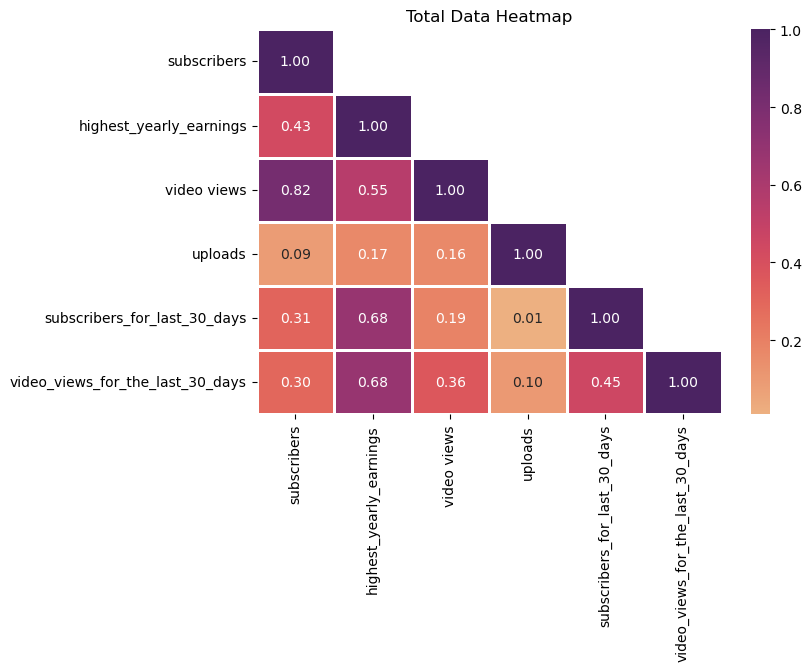

In [691]:
subset_numbers_heatmap = subset_numbersdf.corr()
plt.figure(figsize=(7.5,5))

matrix = np.triu(np.ones_like(subset_numbers_heatmap, dtype=bool))
#matrixtest = np.tril(np.ones_like(subset_numbers_heatmap, dtype=bool))
np.fill_diagonal(matrix,False)
sns.heatmap(subset_numbers_heatmap, annot=True, cmap='flare', fmt=".2f",linewidths=1,mask=matrix)
#sns.heatmap(subset_numbers_heatmap, annot=True, cmap='BuPu', fmt=".2f",linewidths=1,mask=matrixtest)
plt.title('Total Data Heatmap')
plt.show()

Some suprising news comes out of this, it looks as if highest_yearly_earnings is most impacted by recent activity rather than variables that span longer than 30 days, and subscribers is mostly impacted by video views.

If your goal was to make as much money in the year, you would have to attain as many followers and video views as quickly as possible.

If your goal was to get subscribers,  you would want to mostly focus on video views over time.

It would be interesting to see if our top 10 Youtubers that we pulled before go along with these newfound conclusions!

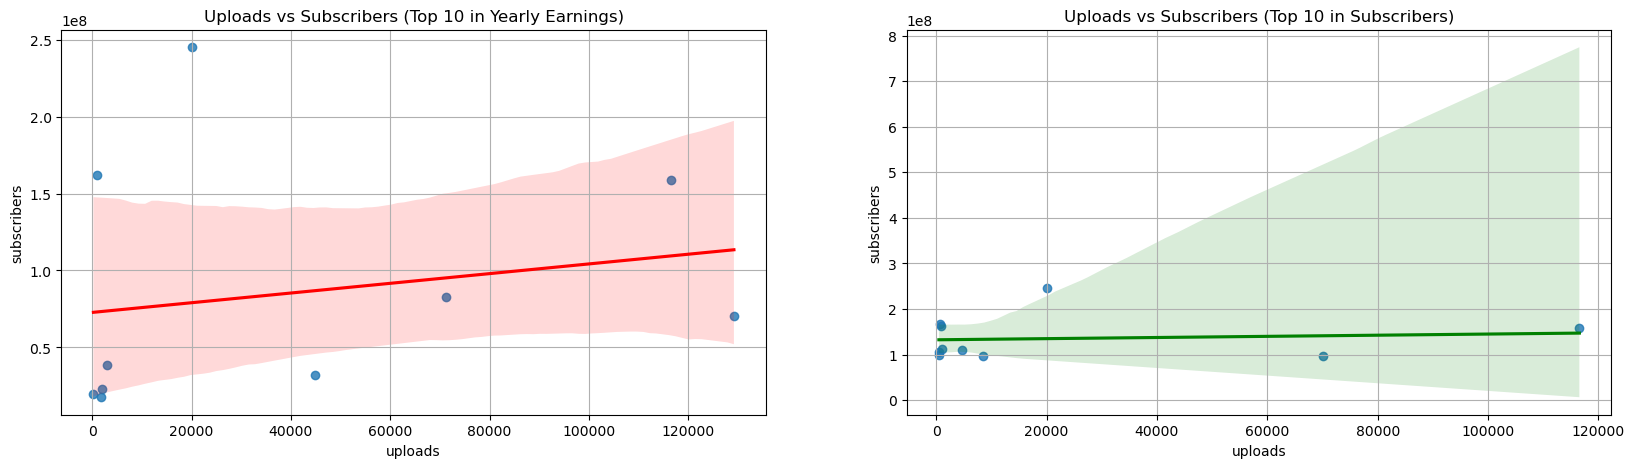

In [671]:
#to show how uploads have an impact on our top 10ers
fig5, axs = plt.subplots(1, 2, figsize=(20,5))

sns.regplot(ax=axs[0], data=top10_earnings, x='uploads', y='subscribers', line_kws={'color': 'red'})
sns.regplot(ax=axs[1], data=top10_subscribership, x='uploads', y='subscribers', line_kws={'color': 'green'})

axs[0].grid(True)
axs[0].set_title('Uploads vs Subscribers (Top 10 in Yearly Earnings)')
axs[1].grid(True)
axs[1].set_title('Uploads vs Subscribers (Top 10 in Subscribers)')

plt.show()

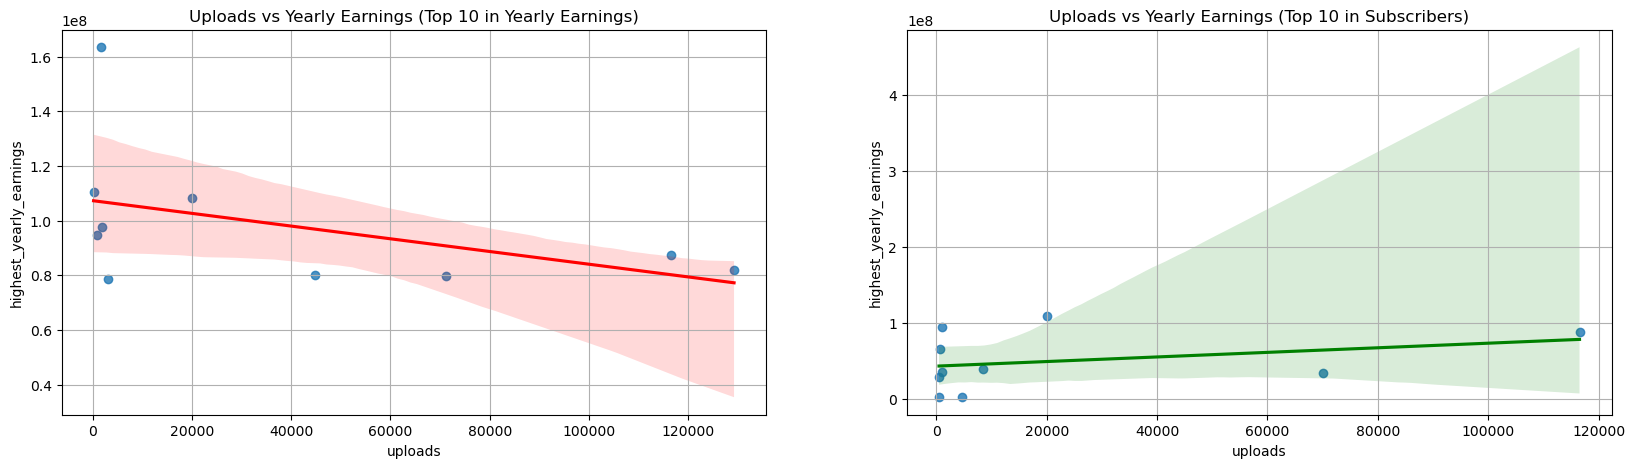

In [672]:
fig6, axs = plt.subplots(1, 2, figsize=(20,5))

sns.regplot(ax=axs[0], data=top10_earnings, x='uploads', y='highest_yearly_earnings', line_kws={'color': 'red'})
sns.regplot(ax=axs[1], data=top10_subscribership, x='uploads', y='highest_yearly_earnings', line_kws={'color': 'green'})

axs[0].grid(True)
axs[0].set_title('Uploads vs Yearly Earnings (Top 10 in Yearly Earnings)')
axs[1].grid(True)
axs[1].set_title('Uploads vs Yearly Earnings (Top 10 in Subscribers)')

plt.show()

20000^ optimal? Looks like there may be a trend with the amount of uploads and possibly an optimal amount to hit before tapering out.

In [673]:
#filtering upload charts to see if the trend from the top 10 holds any weight
df_20k_uploads = df[df['uploads'] <= 20000]
df_5k_uploads = df[df['uploads'] <= 5000]
#max(df_20k_uploads.uploads)

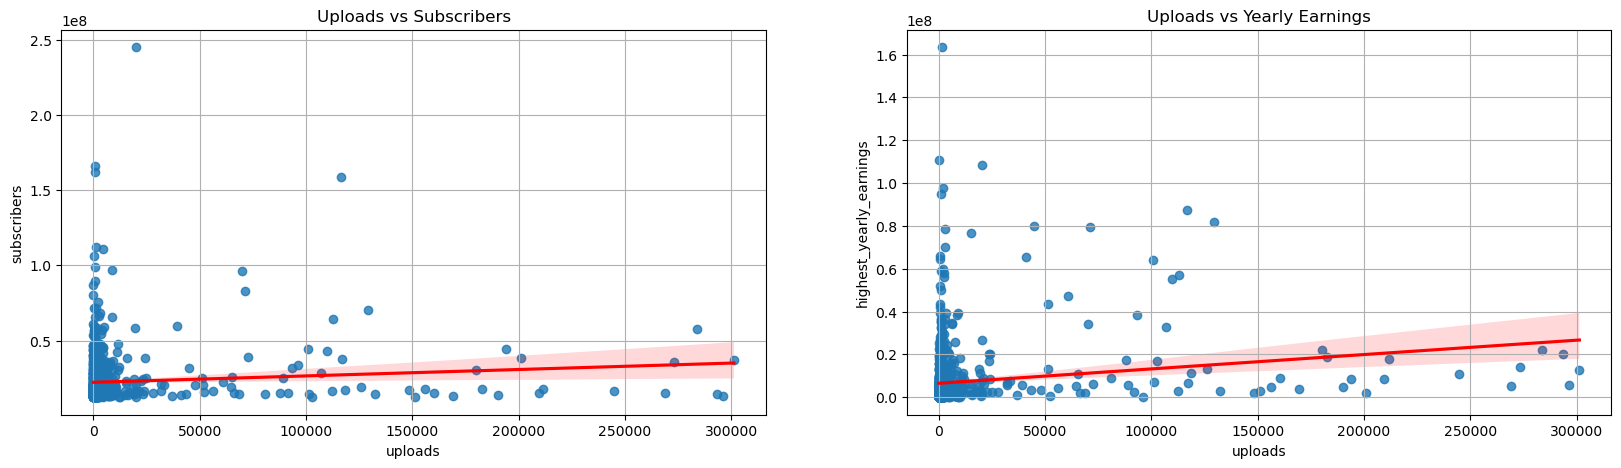

In [664]:
fig8, axs = plt.subplots(1, 2, figsize=(20,5))

sns.regplot(ax=axs[0], data=df, x='uploads', y='subscribers', line_kws={'color': 'red'})
sns.regplot(ax=axs[1], data=df, x='uploads', y='highest_yearly_earnings', line_kws={'color': 'red'})

axs[0].grid(True)
axs[0].set_title('Uploads vs Subscribers')
axs[1].grid(True)
axs[1].set_title('Uploads vs Yearly Earnings')

plt.show()




#sns.regplot(data=df, x='uploads', y='highest_yearly_earnings', line_kws={'color': 'red'})

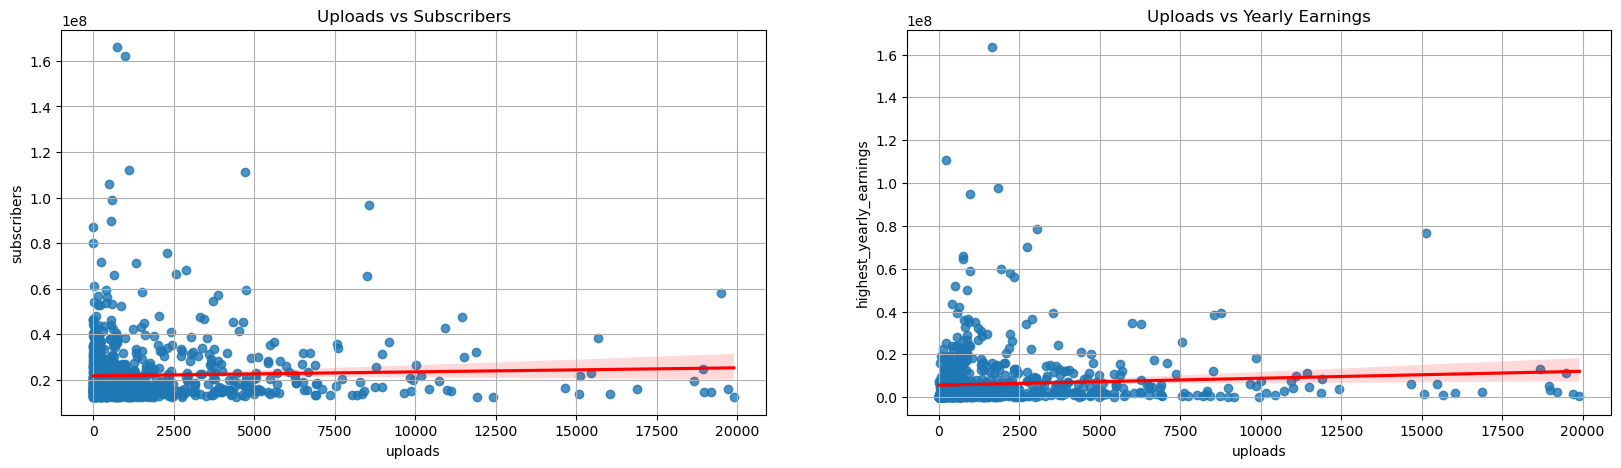

In [668]:
fig9, axs = plt.subplots(1, 2, figsize=(20,5))

sns.regplot(ax=axs[0], data=df_20k_uploads, x='uploads', y='subscribers', line_kws={'color': 'red'})
sns.regplot(ax=axs[1], data=df_20k_uploads, x='uploads', y='highest_yearly_earnings', line_kws={'color': 'red'})

axs[0].grid(True)
axs[0].set_title('Uploads vs Subscribers')
axs[1].grid(True)
axs[1].set_title('Uploads vs Yearly Earnings')

plt.show()

This came as a surprise for me, for the top 10 earners, there is little correlation between the amount of uploads vs. yearly earnings & subscribers. Although it has a slight indication that those that may be spending more time creating a smaller amount of videos make more money. The opposite for subscribers, slight positive increase in subscribers for amount of videos. It will be interesting to see if the top holds up for top 10 subscribers below:


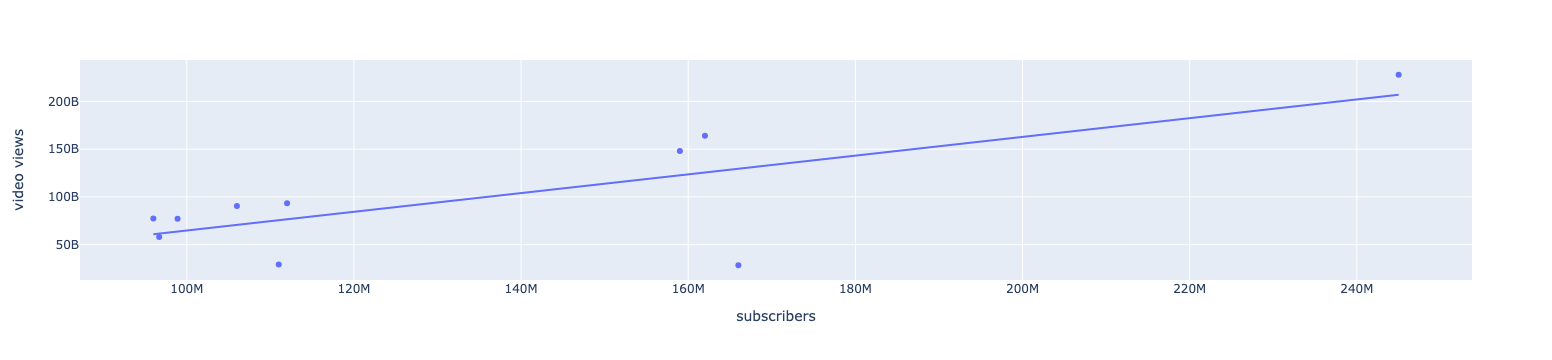

In [198]:
px.scatter(df[df['Youtuber'].isin(top10_subscribership['Youtuber'])], x='subscribers', y='video views', trendline='ols', hover_data=['Youtuber'])

Being in the top 10 of most subscribers, there seems to be some positive correlation with the amount of subscribers they have with the amount of video views with an R^2 of 0.55

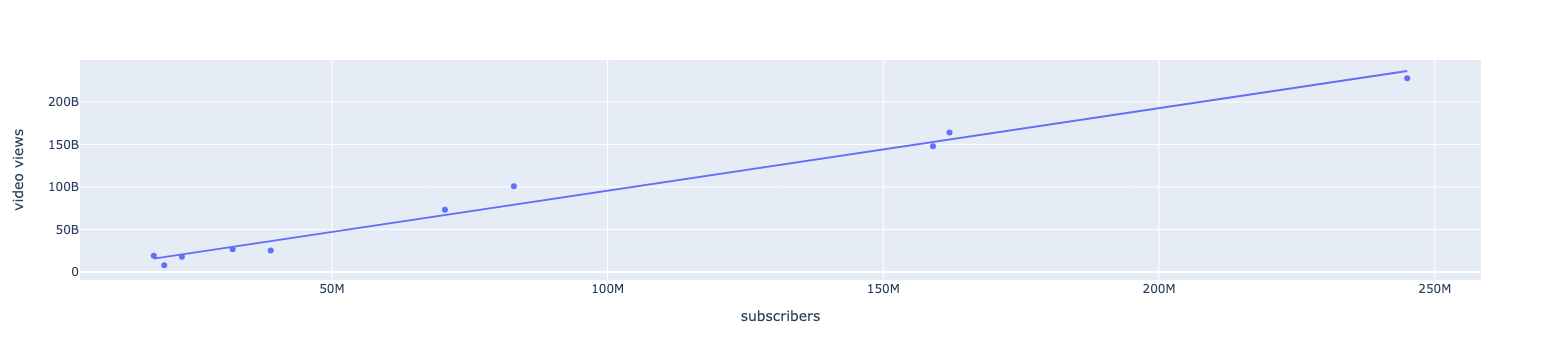

In [200]:
px.scatter(df[df['Youtuber'].isin(top10_earnings['Youtuber'])], x='subscribers', y='video views', trendline='ols', hover_data=['Youtuber'])

Being in the top 10 of highest earners, their video views seemed to have a strong positive correlation with the amount of subscribers they receive, an R^2 of 0.98

Now that we've seen subscribers is highly impacted by the over amount of video views and highest earnings are most impacted by the last 30 days of subscriber and video views, lets look at how other variables outside of the heat map compare

Location, from looking at the top 10 is both categories, seemed to have an impact on the two success variables we are evaluating:

Time to create features! One can debate it is more successful to have more subscribers, and others have better success in earnings in one year but might fall off another. I want to incorporate both of the variables into a success factor, we will look at the top 10 in what I will call, 'earnings_per_sub', which will be a ratio of how many dollars are estimated per subscriber. Another feature I will like to look into is conversion, which will be subscribers and video views ratio. A final feature will be added to look at links for the top 10, where I will look on their Youtube page to gather whether or not they have links attached to their page and what types. A future rendition of this could be done using webscraping for an entire dataframe.

In [315]:
df['earnings_per_sub'] = df.loc[:,'highest_yearly_earnings'] /df.loc[:,'subscribers'] 

In [418]:
df['overall_view_conversion'] = df.loc[:,'subscribers'] /df.loc[:,'video views'] 
df['last_30day_view_conversion'] = df.loc[:,'subscribers_for_last_30_days'] /df.loc[:,'video_views_for_the_last_30_days'] 
top10_eps_conv = df[['Youtuber','earnings_per_sub','last_30day_view_conversion','overall_view_conversion','category','Country', 'uploads']].sort_values(by=['earnings_per_sub'],ascending=False).head(10)
top10_eps_conv

,Youtuber,earnings_per_sub,last_30day_view_conversion,overall_view_conversion,category,Country,uploads
495,ýýýýýýýýý KIMPRO,9.231638,0.000940,0.000922,People & Blogs,South Korea,1646.0
417,DaFuq!?Boom!,5.642857,0.002908,0.002479,Film & Animation,United States,214.0
798,ViralHog,4.678571,0.000806,0.000740,People & Blogs,United States,41117.0
302,KL BRO Biju Rithvik,4.280702,0.001574,0.001267,Entertainment,India,1841.0
905,GH'S,3.992308,0.000925,0.001488,Gaming,South Korea,510.0
712,Filaretiki,3.905405,0.001413,0.000937,People & Blogs,United States,2222.0
483,BeatboxJCOP,3.666667,0.002473,0.002065,Film & Animation,South Korea,748.0
332,ZAMZAM ELECTRONICS TRADING,3.534562,0.002128,0.002551,People & Blogs,United Arab Emirates,15126.0
970,_vector_,3.500000,0.001328,0.001632,Comedy,United States,398.0
388,dednahype,2.960396,0.000964,0.000966,Comedy,Latvia,1935.0


In [962]:
top10_eps_conv.iloc[:,[0,1,4,5]]

,Youtuber,earnings_per_sub,category,Country
495,ýýýýýýýýý KIMPRO,9.231638,People & Blogs,South Korea
417,DaFuq!?Boom!,5.642857,Film & Animation,United States
798,ViralHog,4.678571,People & Blogs,United States
302,KL BRO Biju Rithvik,4.280702,Entertainment,India
905,GH'S,3.992308,Gaming,South Korea
712,Filaretiki,3.905405,People & Blogs,United States
483,BeatboxJCOP,3.666667,Film & Animation,South Korea
332,ZAMZAM ELECTRONICS TRADING,3.534562,People & Blogs,United Arab Emirates
970,_vector_,3.500000,Comedy,United States
388,dednahype,2.960396,Comedy,Latvia


In [964]:
print(np.mean(df.earnings_per_sub))
#df['earnings_per_sub']=df['earnings_per_sub'].replace(0,df['earnings_per_sub'].mean())
#replacing zeroes with means

0.33666291305803275


Looking at distributions of data for the new features

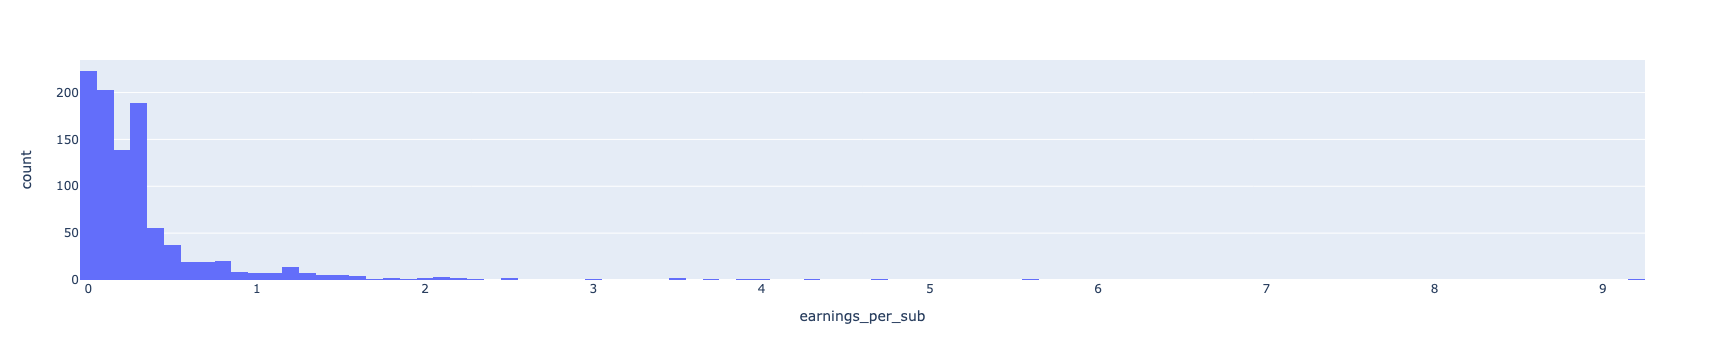

In [973]:

#hist = df['earnings_per_sub'].hist(bins=15)
hist = px.histogram(df, x="earnings_per_sub")
hist.show()

In [981]:
#df[df['overall_view_conversion'] == max(df.overall_view_conversion)].overall_view_conversion

286    8807.896735
Name: overall_view_conversion, dtype: float64

In [986]:
df[df['overall_view_conversion'] > 0.5]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,earnings_per_sub,last_30day_view_conversion,links,overall_view_conversion,youtuber_count
286,287.0,Happy Lives,23200000.0,2634.0,Science & Technology,Happy Lives,1.0,United States,US,Entertainment,4053372.0,84.0,79.0,6.589000e+09,0.0,0.0,0.0,0.0,100000.0,2016.0,Mar,15.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,0.313182,0.000015,0,8807.896735,1
700,701.0,ýýýýýý,14900000.0,439098.0,People & Blogs,ýýýýýý,1.0,Russia,RU,News,3609784.0,10.0,19.0,7.697000e+03,2.0,31.0,23.0,369.0,NaN,2008.0,Aug,11.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756,0.000025,NaN,0,33.933199,1
852,853.0,Vibhu 96,13400000.0,20563378.0,Education,Vibhu 96,256.0,India,IN,Education,342460.0,114.0,40.0,2.026400e+07,5100.0,81100.0,60800.0,972700.0,300000.0,2022.0,Jun,5.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,0.072590,0.014805,0,0.651644,1
902,903.0,Calon Sarjana,13000000.0,10664585.0,Entertainment,Calon Sarjana,29.0,Indonesia,ID,Entertainment,772571.0,31.0,166.0,2.292000e+09,0.0,0.0,0.0,0.0,300000.0,2016.0,Jan,20.0,36.3,2.702039e+08,4.69,151509724.0,-0.789275,113.921327,0.313182,0.000131,0,1.218988,1


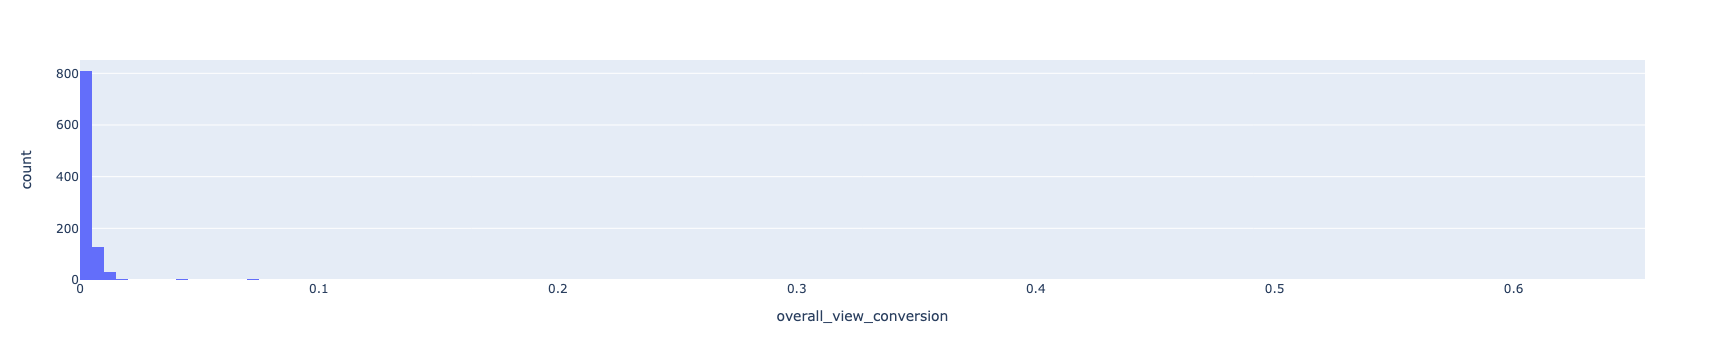

In [985]:
#hist2 = df['overall_view_conversion'].hist(bins=30)
# filtered out some of the values that were errors since their yearly earnings weren't listed
hist2 = px.histogram(df[df['overall_view_conversion'] < 1], x="overall_view_conversion")
hist2.show()

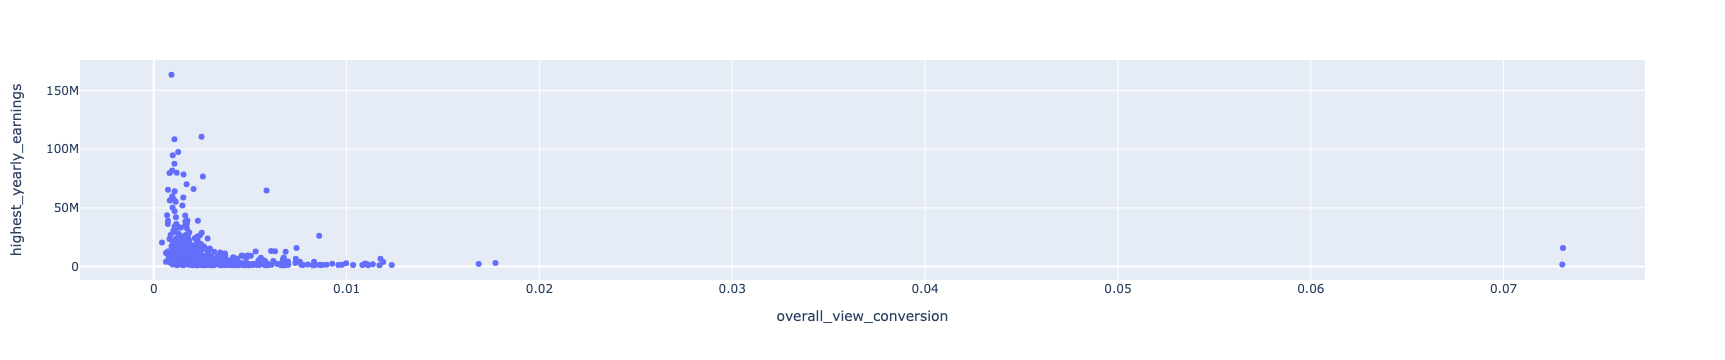

In [994]:
px.scatter(df[df['highest_yearly_earnings']>1000000], x='overall_view_conversion', y='highest_yearly_earnings')

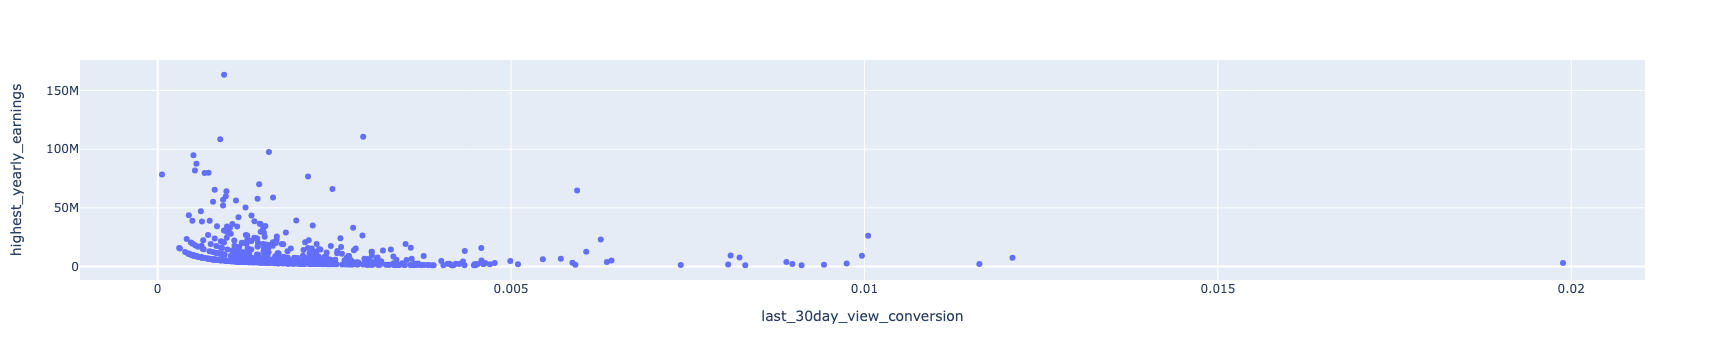

In [993]:
px.scatter(df[df['highest_yearly_earnings']>1000000], x='last_30day_view_conversion', y='highest_yearly_earnings')

In [412]:
subset_features_numbersdf = df[['subscribers','highest_yearly_earnings','video views', 'uploads', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days','earnings_per_sub','last_30day_view_conversion','overall_view_conversion','links']]

In [720]:
# newfeature_numbersdf = subset_features_numbersdf.select_dtypes(include=['number'])  
# newfeature_numbers_heatmap = newfeature_numbersdf.corr()
# plt.figure(figsize=(7.5,5))
# matrix1 = np.triu(np.ones_like(newfeature_numbers_heatmap, dtype=bool))
# np.fill_diagonal(matrix1,False)
# sns.heatmap(newfeature_numbers_heatmap, annot=True, cmap='flare', fmt=".2f",linewidths=1,mask = matrix1)
# plt.title('Numbers Heatmap')
# plt.show()

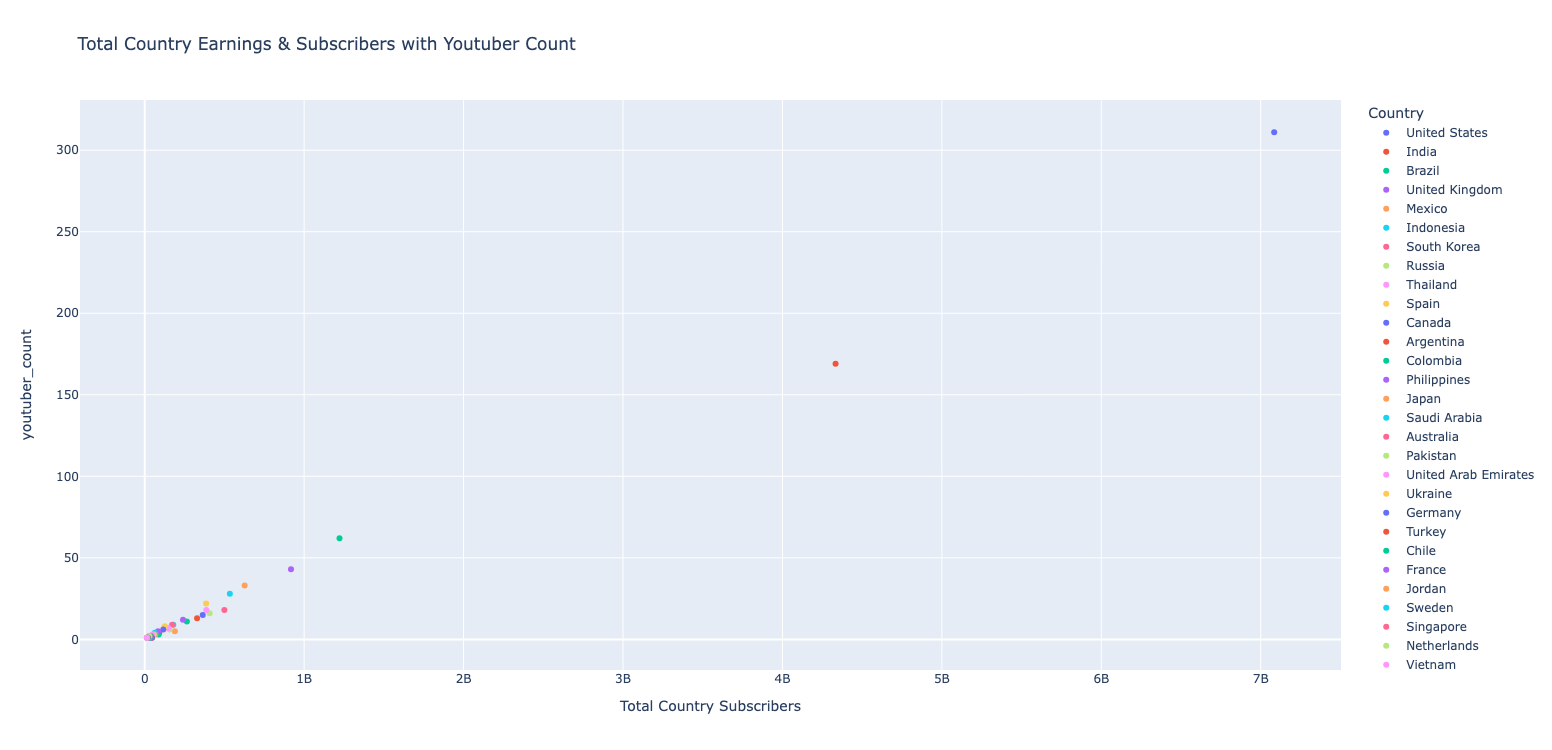

In [633]:
px.scatter(countrydf, 
           x='subscribers',y='youtuber_count',
              # size='highest_yearly_earnings',
               color=countrydf.index,
                labels = {'subscribers': 'Total Country Subscribers',
                          'highest_yearly_earnings': 'Highest Total Yearly Earnings'},
                     title ='Total Country Earnings & Subscribers with Youtuber Count').update_layout(
                                                                                autosize=False, height=750, width=700)

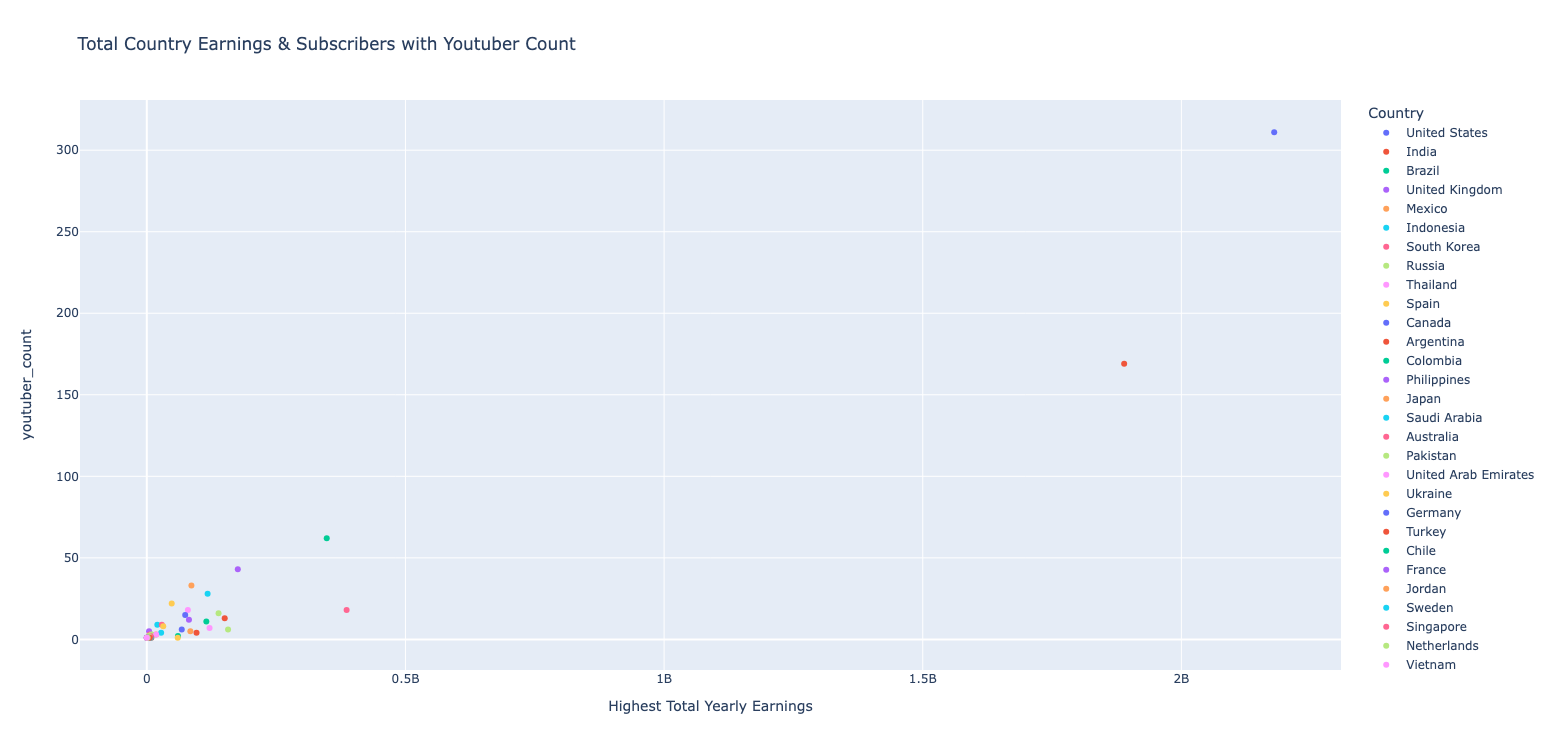

In [635]:
px.scatter(countrydf, 
           x='highest_yearly_earnings',y='youtuber_count',
              #size='subscribers',
               color=countrydf.index,
                labels = {'subscribers': 'Total Country Subscribers',
                          'highest_yearly_earnings': 'Highest Total Yearly Earnings'},
                     title ='Total Country Earnings & Subscribers with Youtuber Count').update_layout(
                                                                                autosize=False, height=750, width=700)

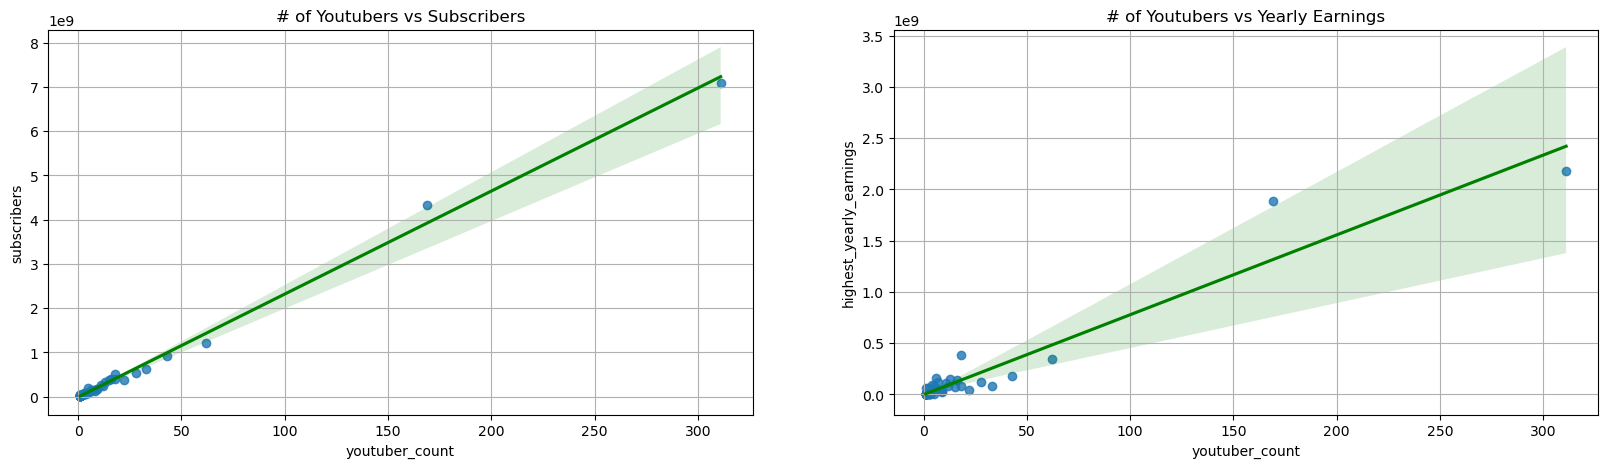

In [637]:
fig7, axs = plt.subplots(1, 2, figsize=(20,5))

sns.regplot(ax=axs[0], data=countrydf, x='youtuber_count', y='subscribers', line_kws={'color': 'green'})
sns.regplot(ax=axs[1], data=countrydf, x='youtuber_count', y='highest_yearly_earnings', line_kws={'color': 'green'})

axs[0].grid(True)
axs[0].set_title('# of Youtubers vs Subscribers')
axs[1].grid(True)
axs[1].set_title('# of Youtubers vs Yearly Earnings')

plt.show()

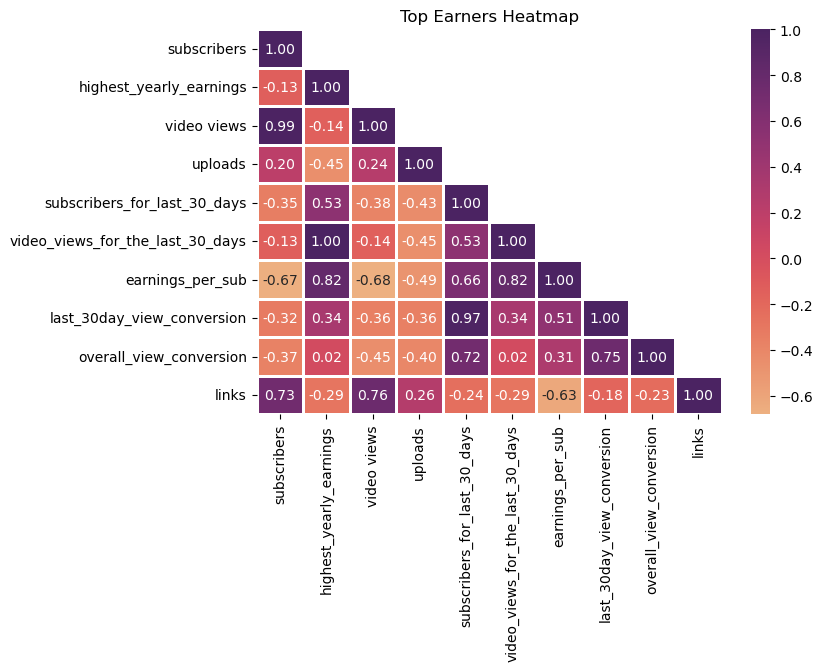

In [999]:
sub_top10e_df = top10_earnings[['Youtuber','category','Country','subscribers','highest_yearly_earnings','video views', 'uploads', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days','earnings_per_sub','last_30day_view_conversion','overall_view_conversion','links']]
sub_top10e_df = sub_top10e_df.select_dtypes(include=['number'])  
top10_num_heatmap = sub_top10e_df.corr()
plt.figure(figsize=(7.5,5))
matrix5 = np.triu(np.ones_like(top10_num_heatmap, dtype=bool))
#matrix4 = np.tril(np.ones_like(top10_num_heatmap, dtype=bool))
np.fill_diagonal(matrix5,False)
sns.heatmap(top10_num_heatmap, annot=True, cmap='flare', fmt=".2f",linewidths=1,mask = matrix5)
#sns.heatmap(top10_num_heatmap, annot=True, cmap='flare', fmt=".2f",linewidths=1,cbar=False, mask = matrix4)
plt.title('Top Earners Heatmap')
plt.show() 

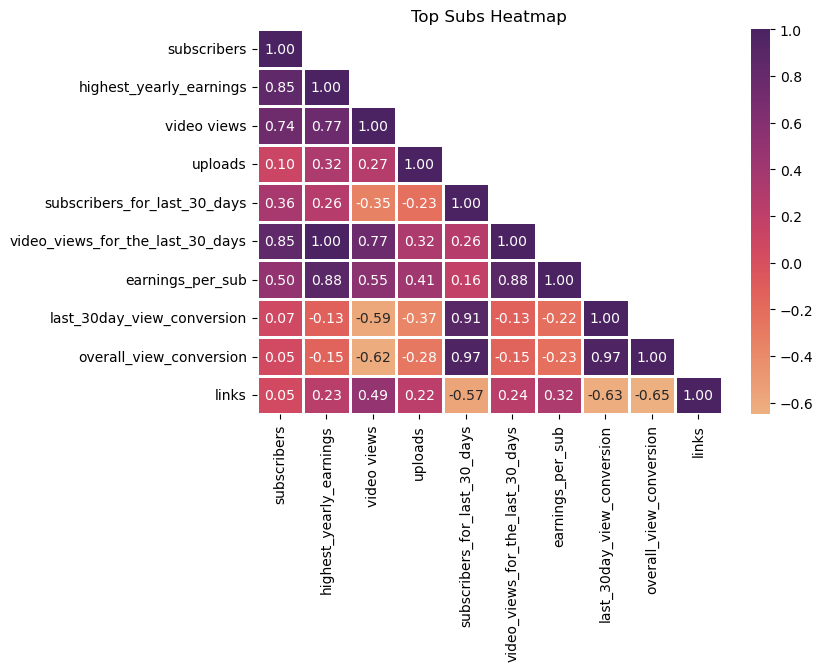

In [1003]:
sub_top10s_df = top10_subscribership[['Youtuber','category','Country','subscribers','highest_yearly_earnings','video views', 'uploads', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days','earnings_per_sub','last_30day_view_conversion','overall_view_conversion','links']]
sub_top10s_df = sub_top10s_df.select_dtypes(include=['number'])  
top10s_num_heatmap = sub_top10s_df.corr()
plt.figure(figsize=(7.5,5))
matrix6 = np.triu(np.ones_like(top10s_num_heatmap, dtype=bool))
#matrix4 = np.tril(np.ones_like(top10_num_heatmap, dtype=bool))
np.fill_diagonal(matrix6,False)
sns.heatmap(top10s_num_heatmap, annot=True, cmap='flare', fmt=".2f",linewidths=1,mask = matrix6)
#sns.heatmap(top10_num_heatmap, annot=True, cmap='flare', fmt=".2f",linewidths=1,cbar=False, mask = matrix4)
plt.title('Top Subs Heatmap')
plt.show() 

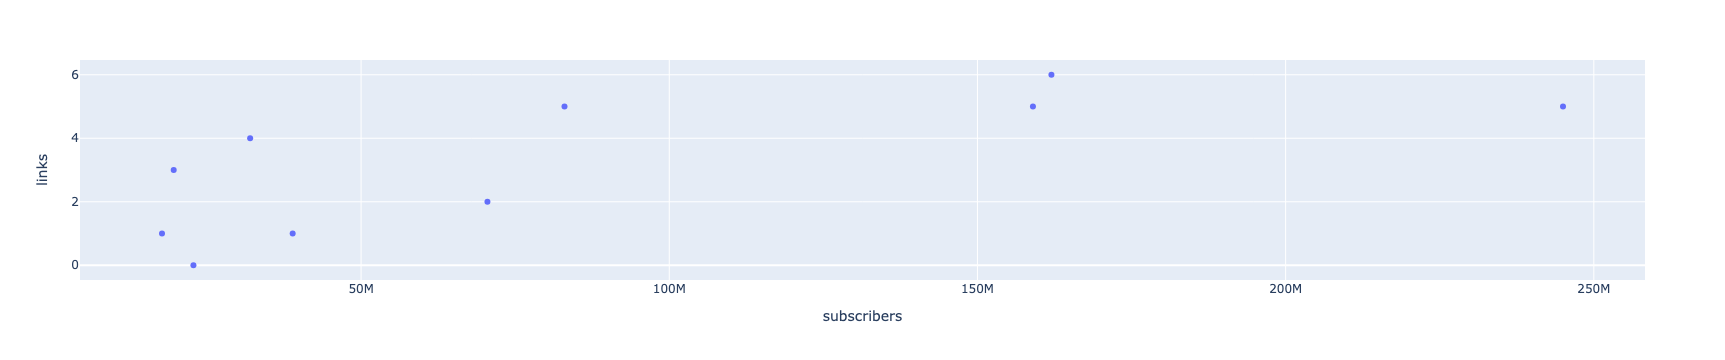

In [1000]:
px.scatter(sub_top10e_df, x='subscribers', y='links')